In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample, convolve

In [2]:
PERIOD = 1250

In [3]:
Y = pd.read_csv("beijing_temperature.csv", header=None, usecols=range(PERIOD)).to_numpy()
Y

array([[ -10,    5,   10, ...,  210,  205,  190],
       [ -29,  -29,  -34, ...,  244,  244,  239],
       [ -20,  -34,  -44, ...,   34,   39,   49],
       ...,
       [ -34,  -39,  -34, ...,  483,  464,  444],
       [-112, -122, -127, ...,  488,  464,  454],
       [   5,    0,   -5, ...,  244,  229,  215]])

In [4]:
# Y = resample(Y, 1500, axis=1)
# Y = np.round(Y)
# Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
Y.shape

(12, 1250)

In [5]:
# kernel = 0.2 * np.ones(7)
# smoothed_ecg = np.zeros_like(Y)
# for i in range(12):
    # Y[i] = convolve(Y[i], kernel, mode="same")
#     plt.figure(figsize=(50, 5))
#     plt.plot(Y[i][:PERIOD], 'o-')
#     # plt.plot(smoothed_ecg[i][:3*400], '.-')

In [6]:
baseline = np.mean(Y, axis=1)
baseline

array([ 7.7832,  5.7248, -2.0456, -5.5432,  3.6992,  0.5744, -5.952 ,
       15.556 , 13.1808, 13.492 ,  0.2184, 22.8224])

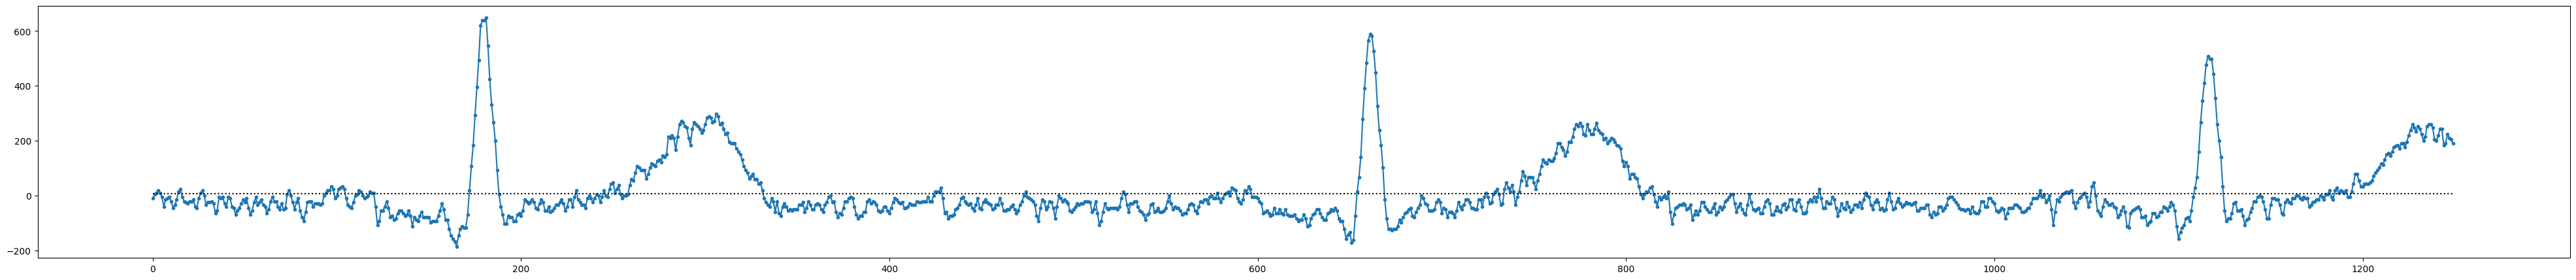

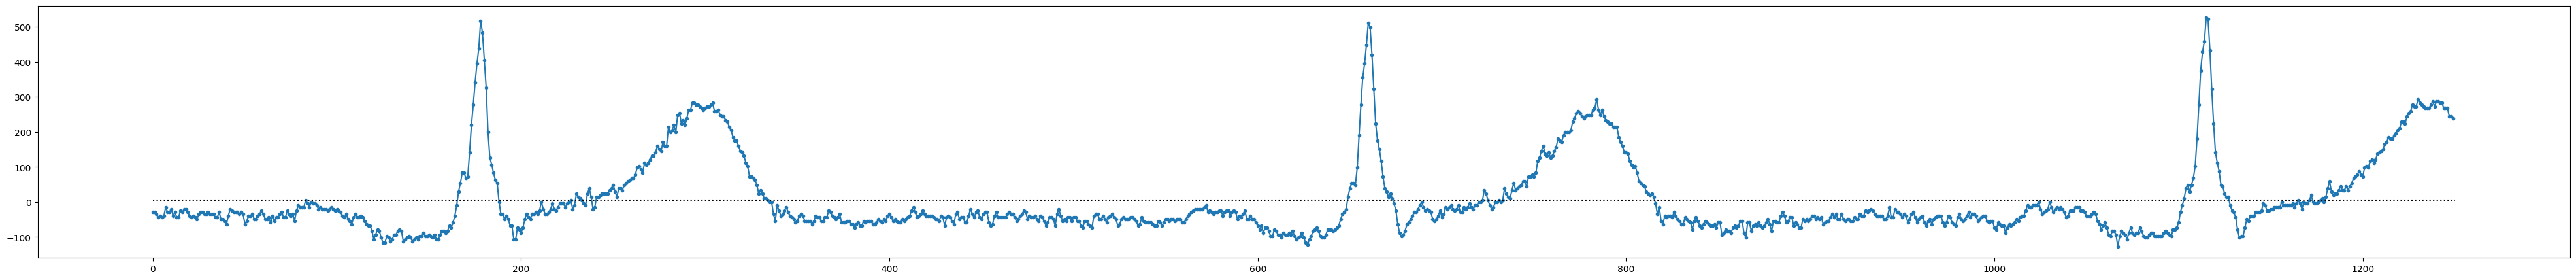

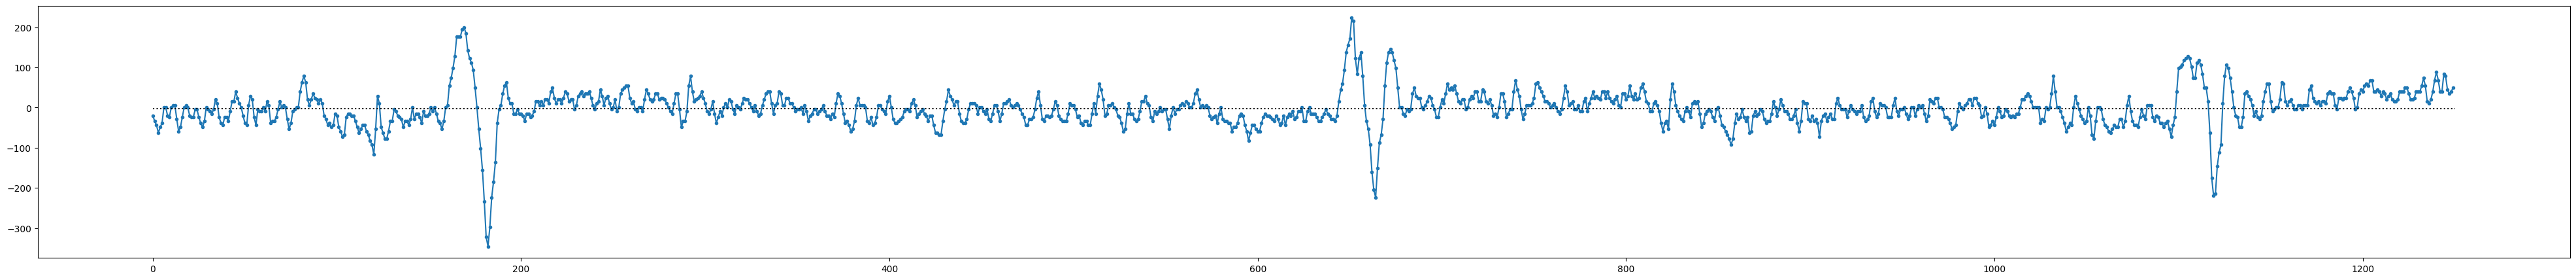

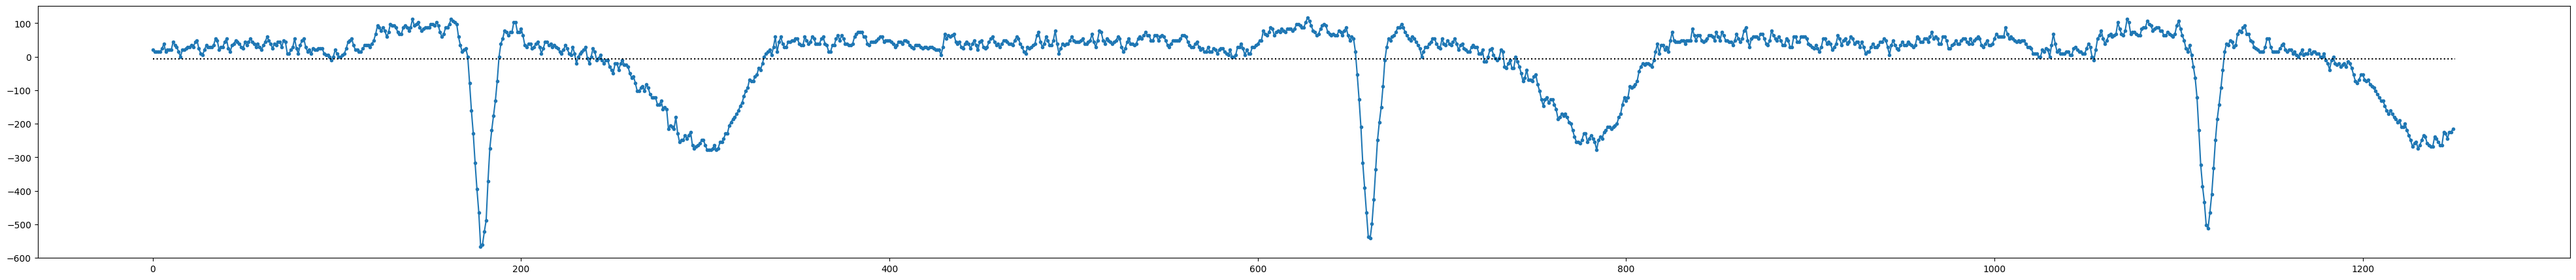

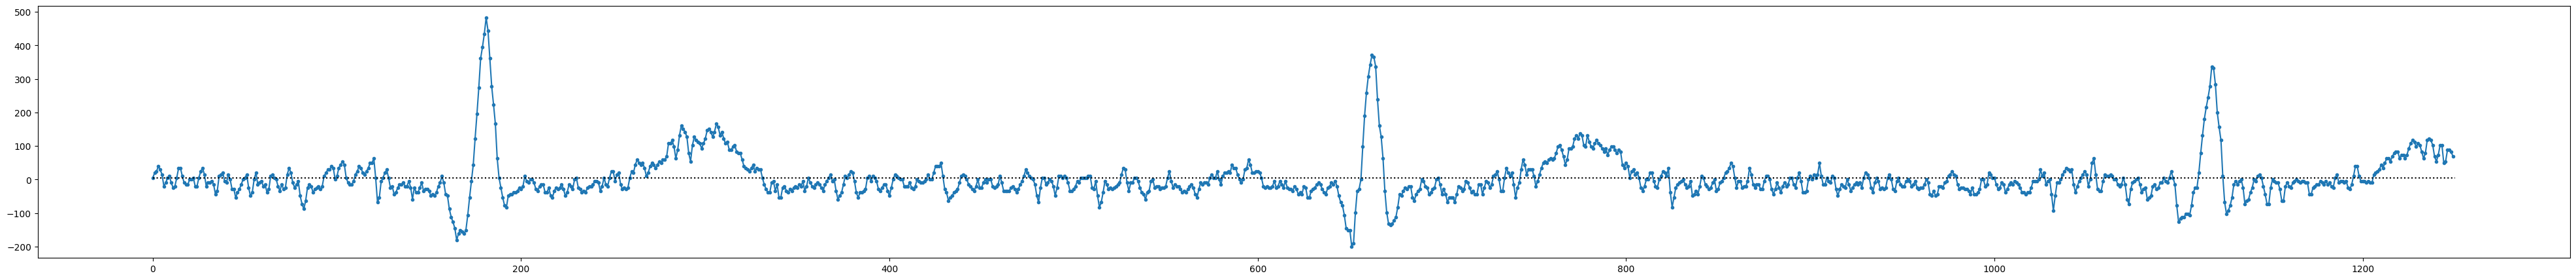

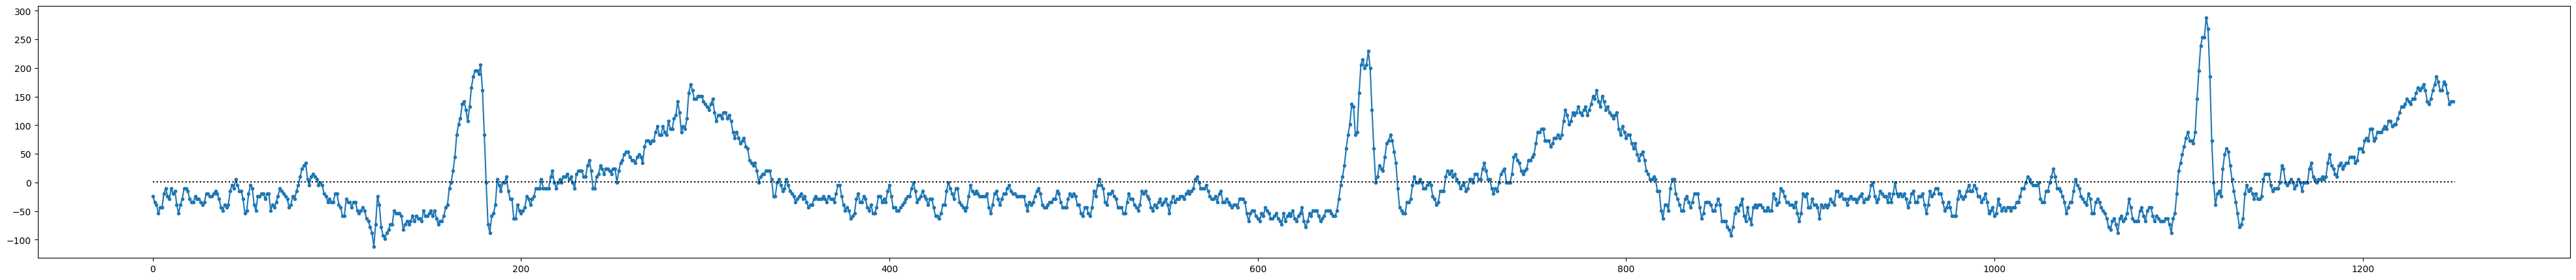

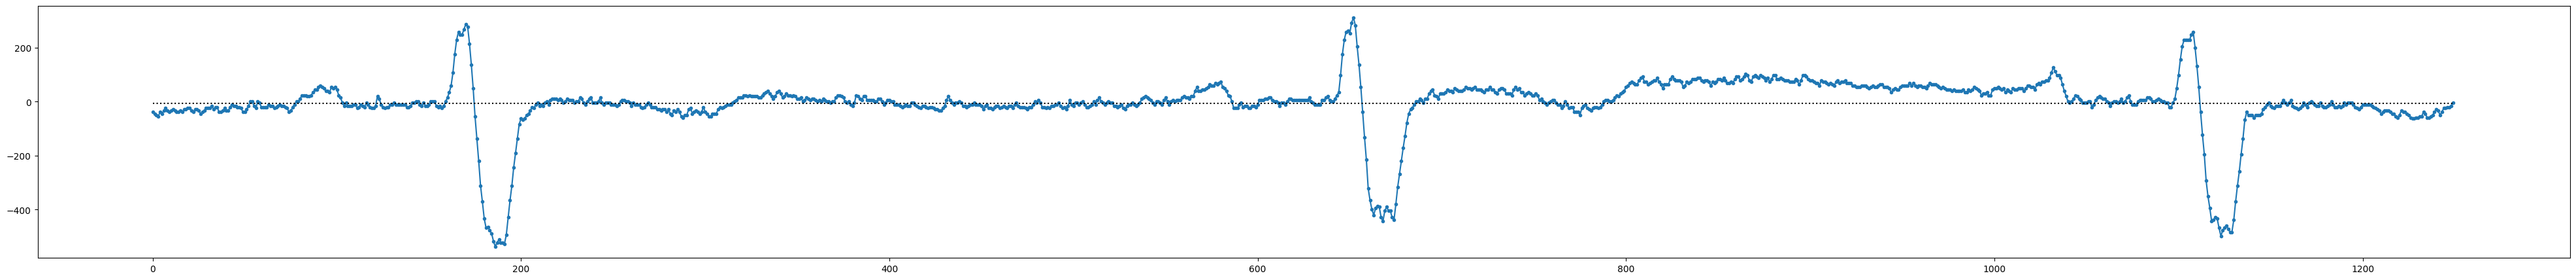

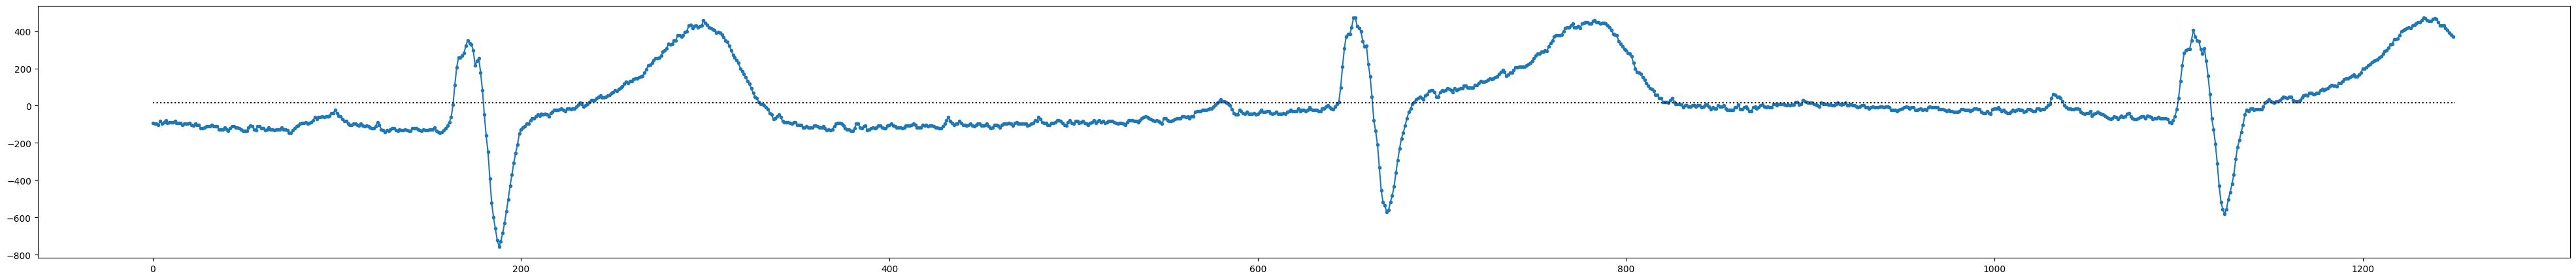

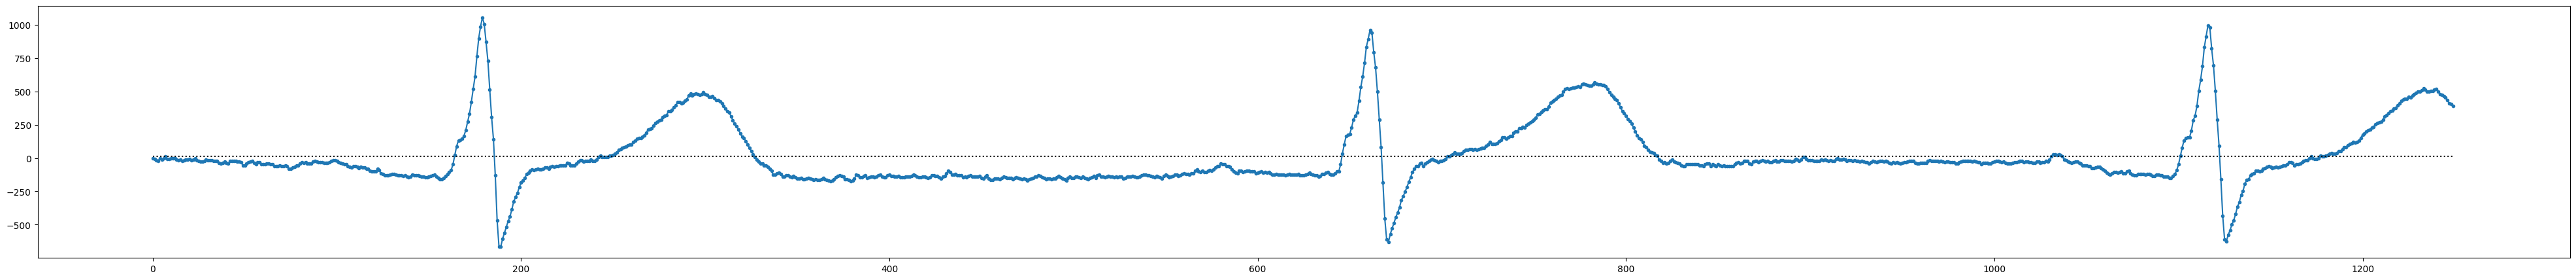

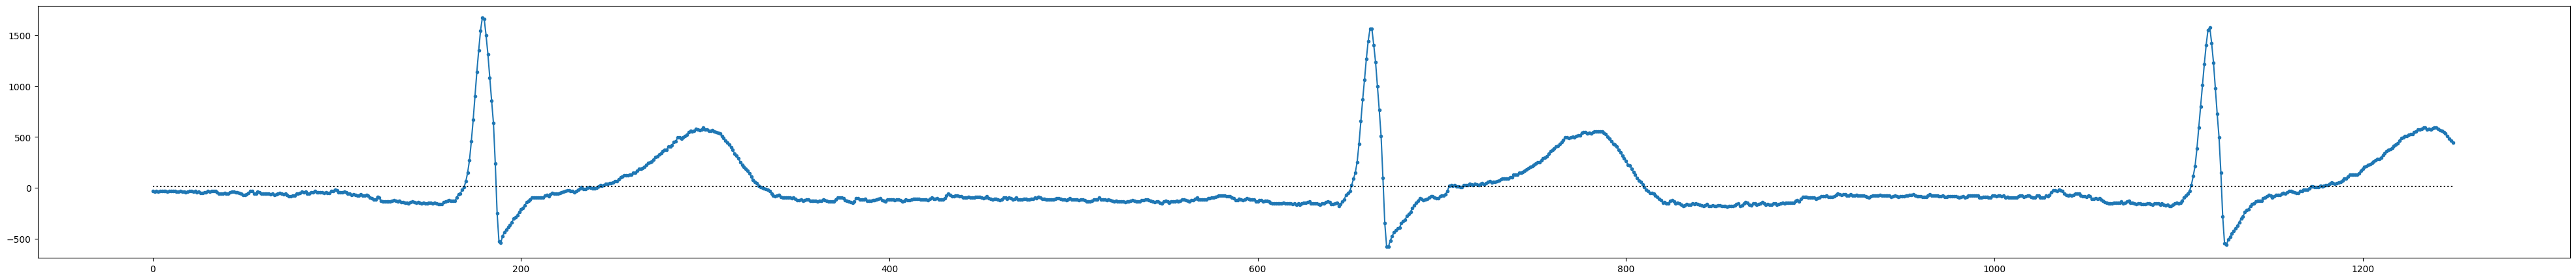

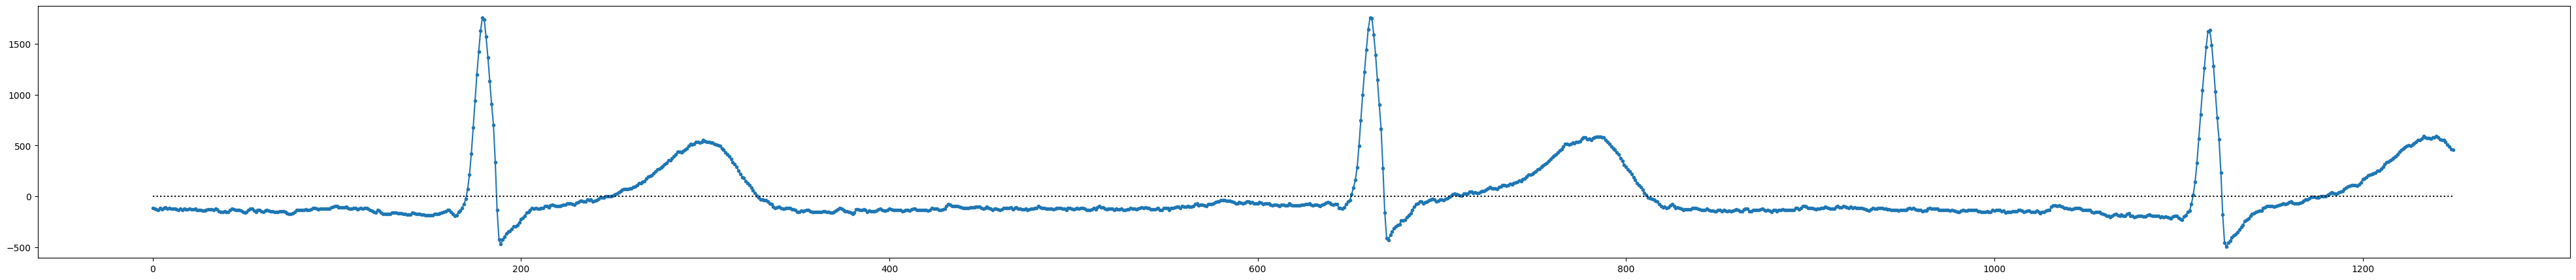

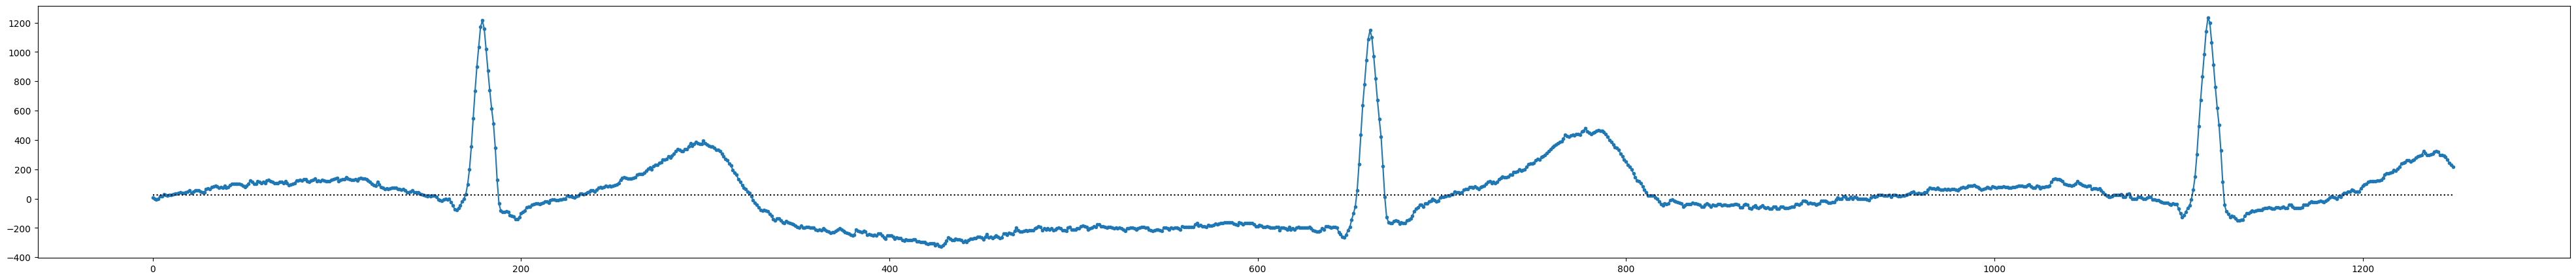

In [7]:
for i in range(12):
    plt.figure(figsize=(50, 5))
    plt.plot(Y[i][:PERIOD], '.-')
    plt.hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")

In [8]:
rec = pd.read_csv("5000_asis_3_6_500it.csv", header=None).to_numpy()
rec.shape

(12, 1250)

In [9]:
# kernel = 0.2 * np.ones(7)
# smoothed_ecg = np.zeros_like(Y)
# for i in range(12):
    # rec[i] = convolve(rec[i], kernel, mode="same")

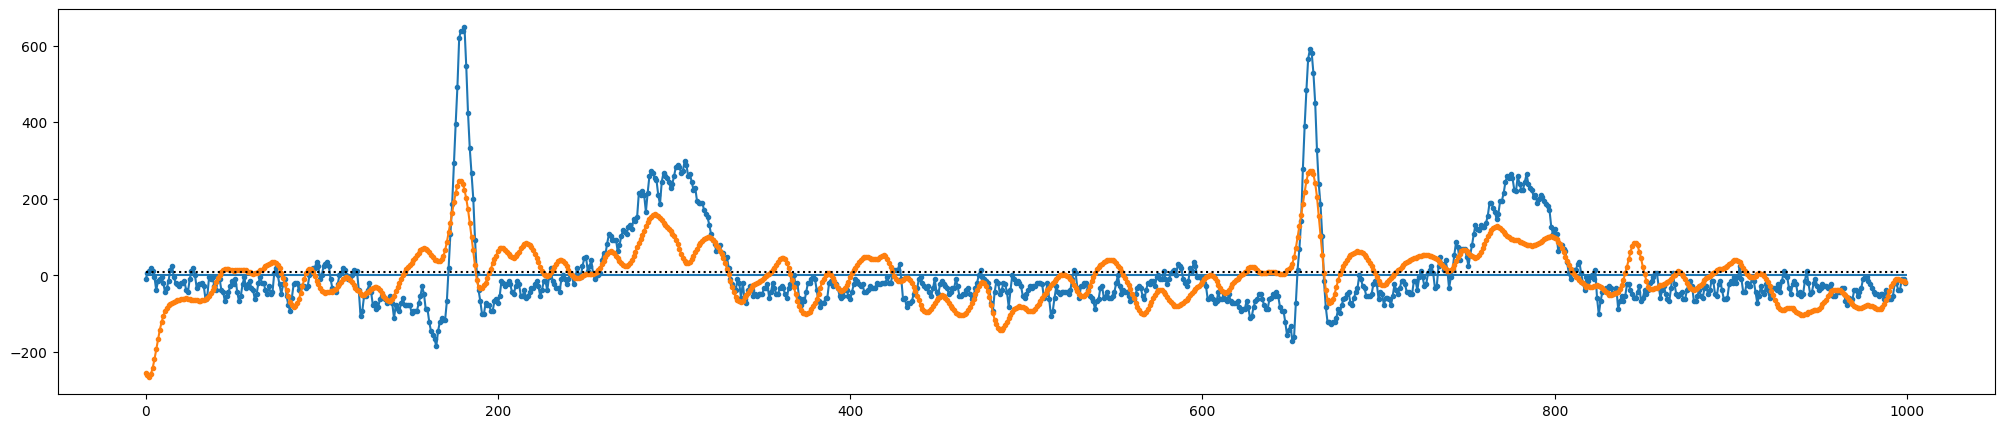

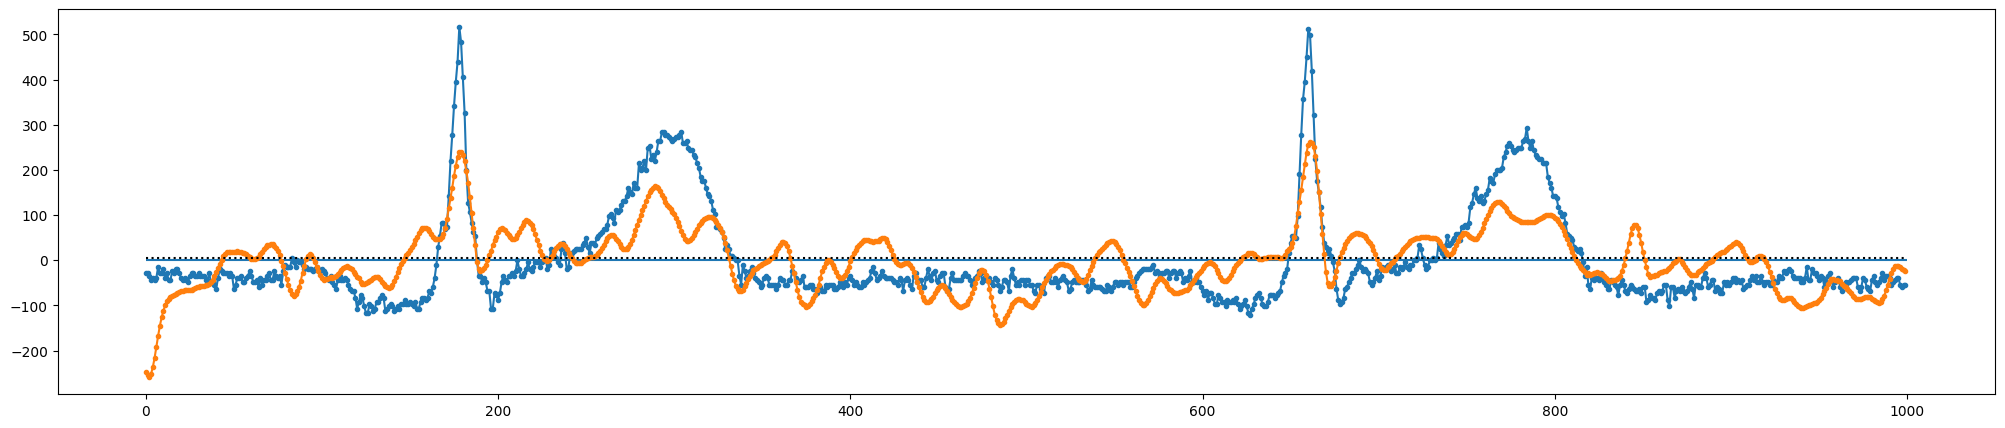

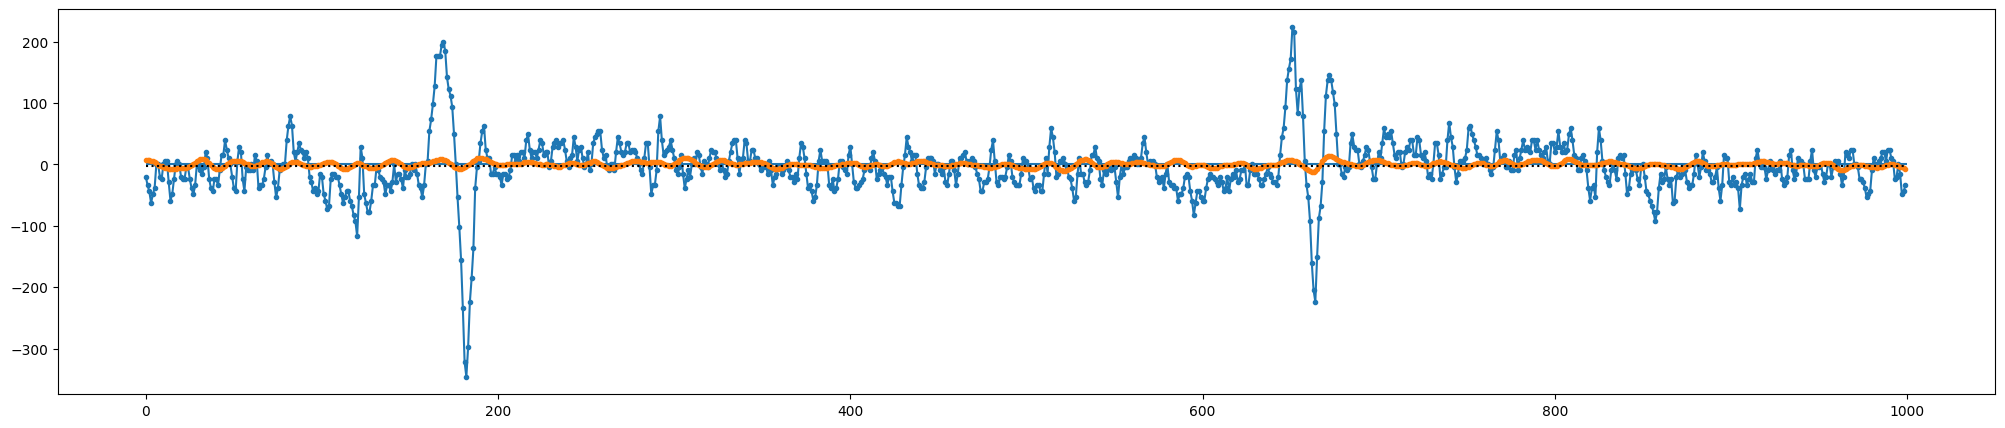

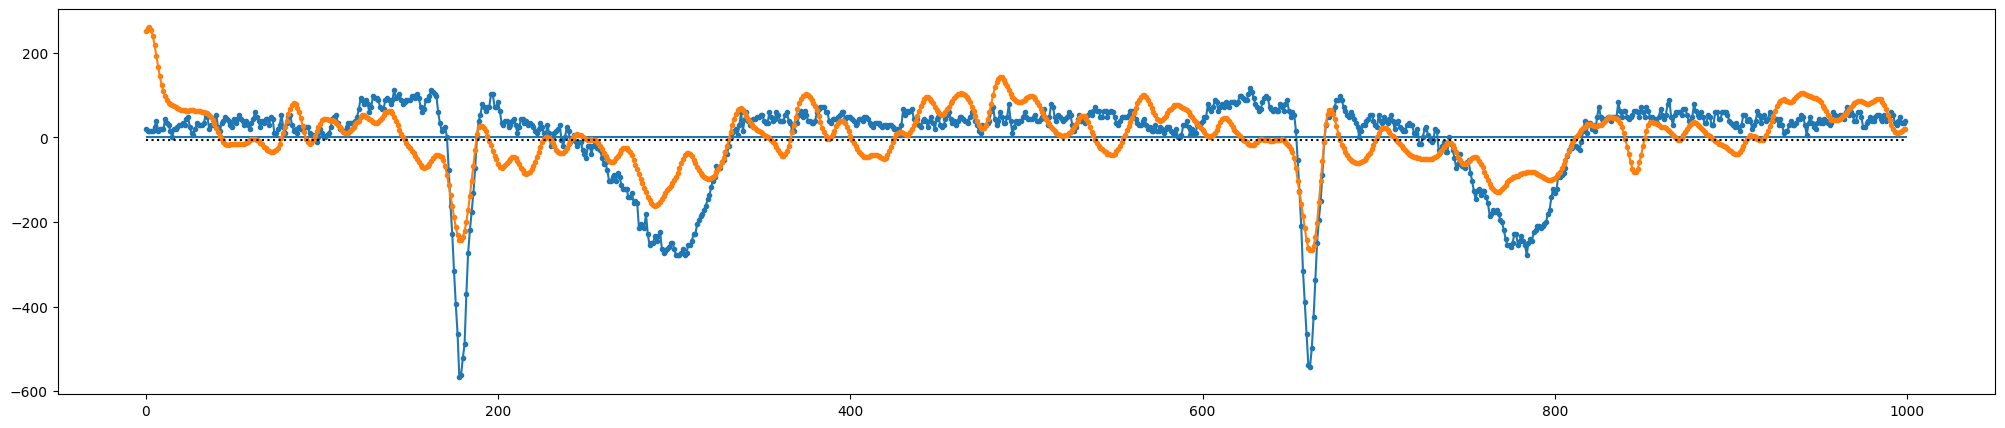

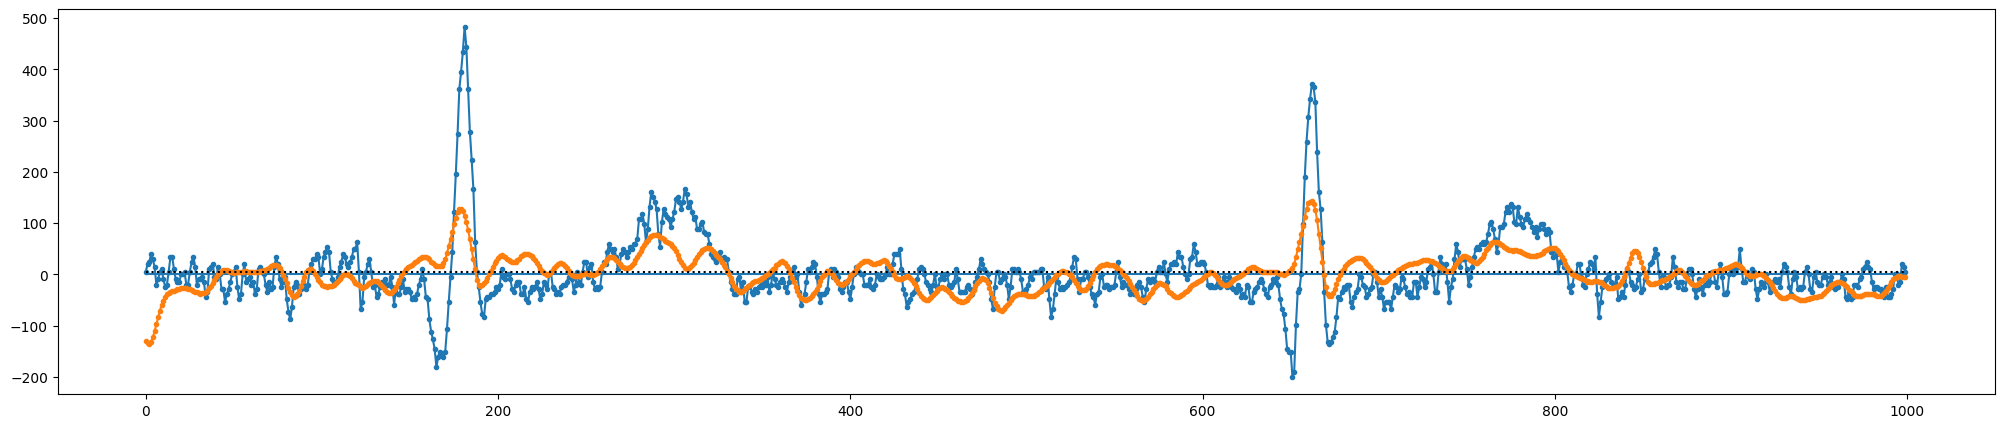

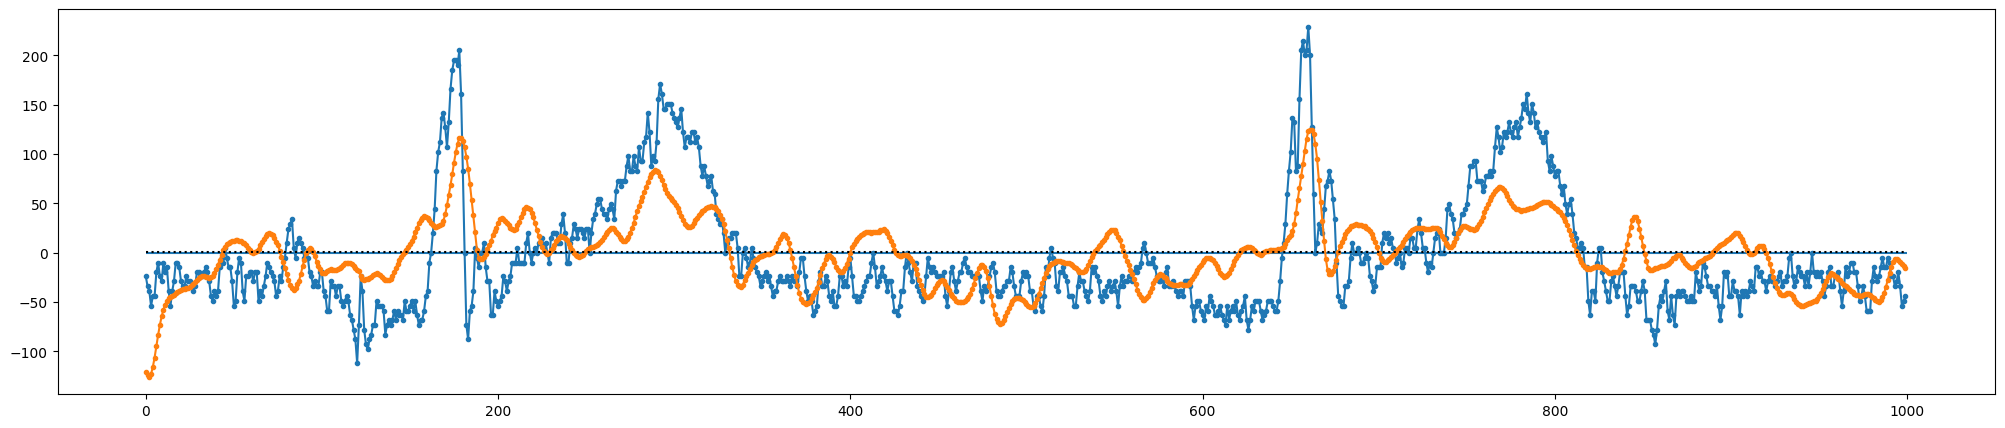

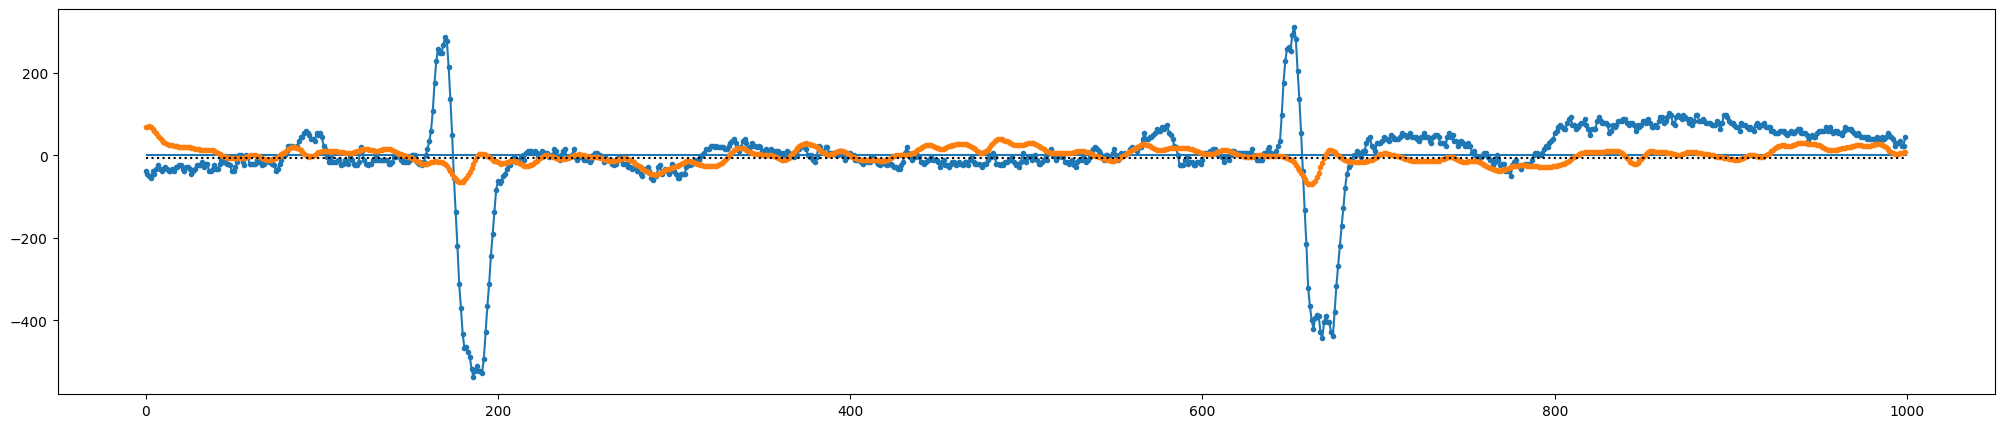

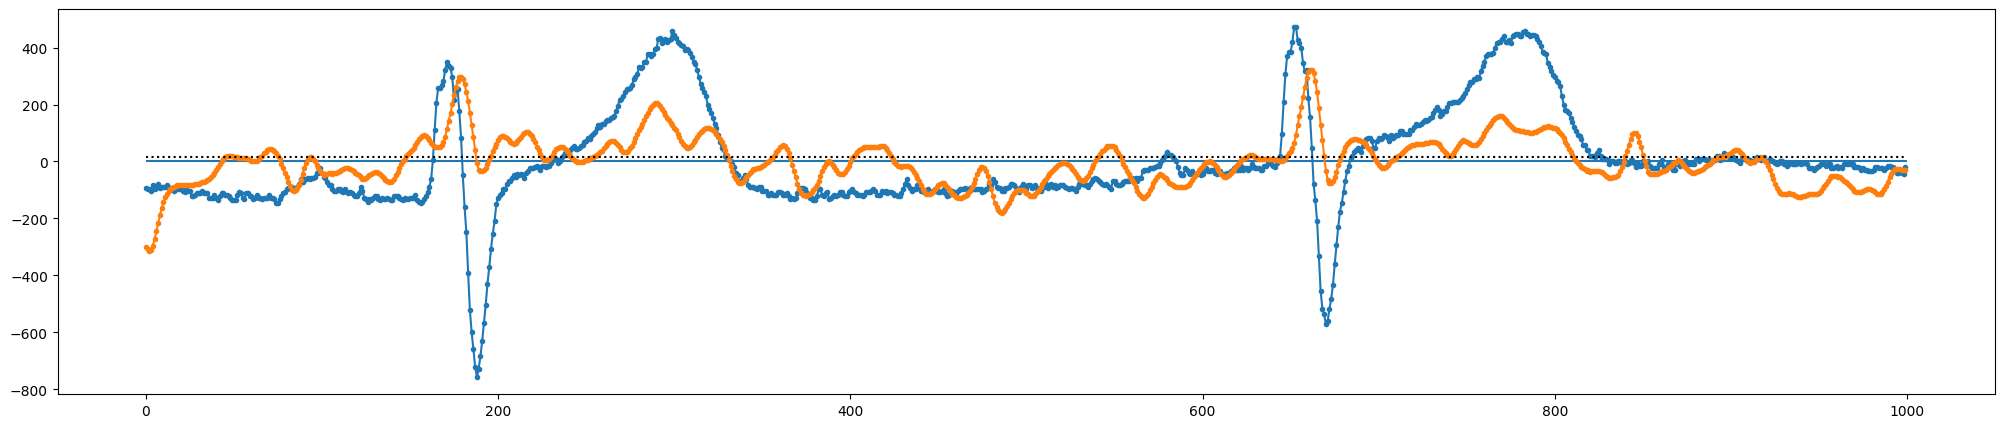

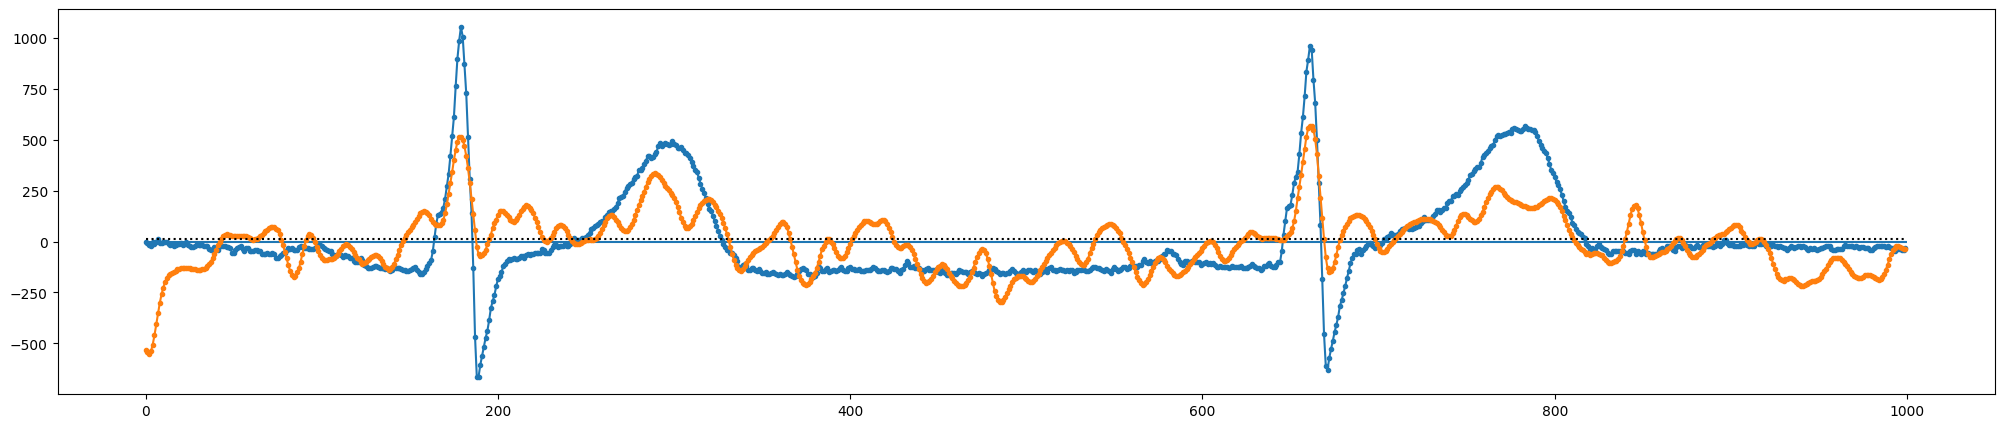

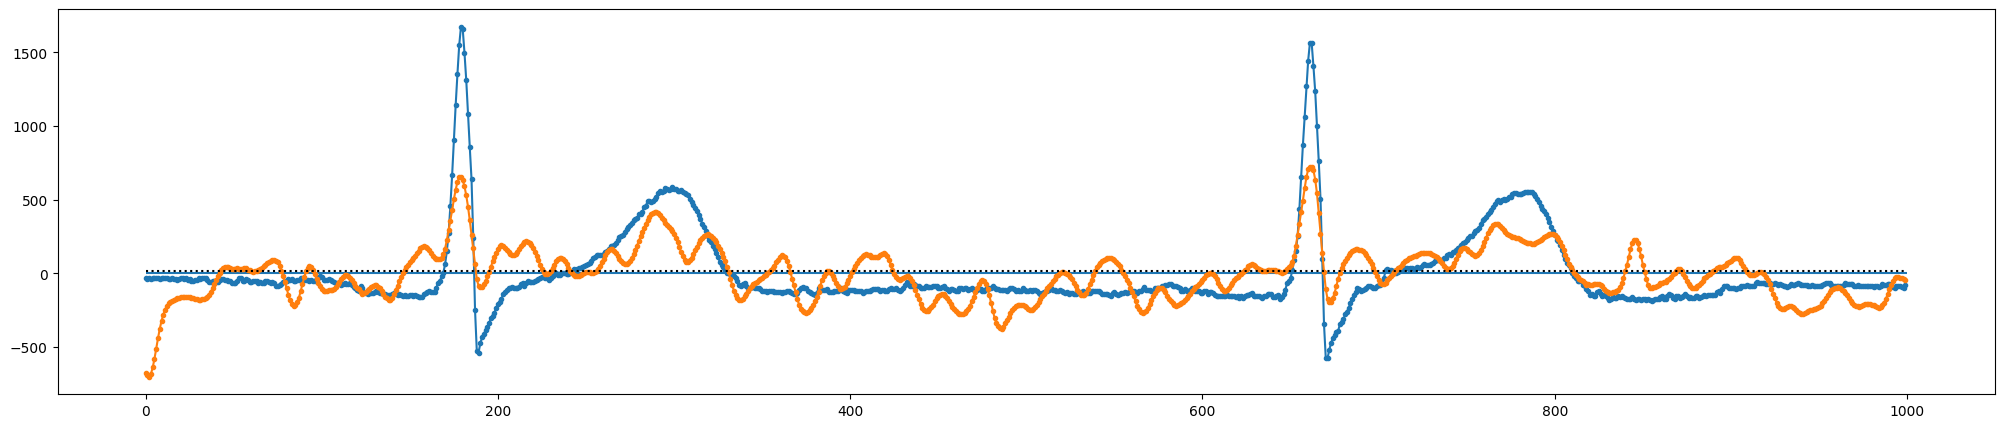

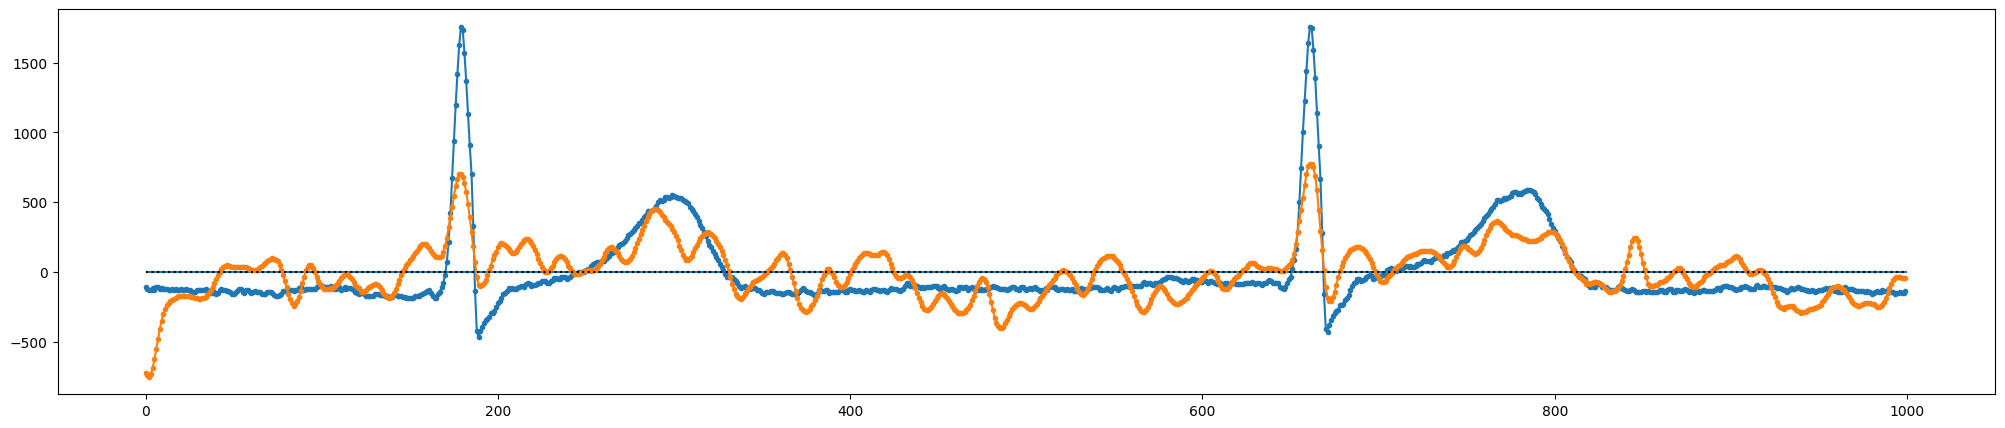

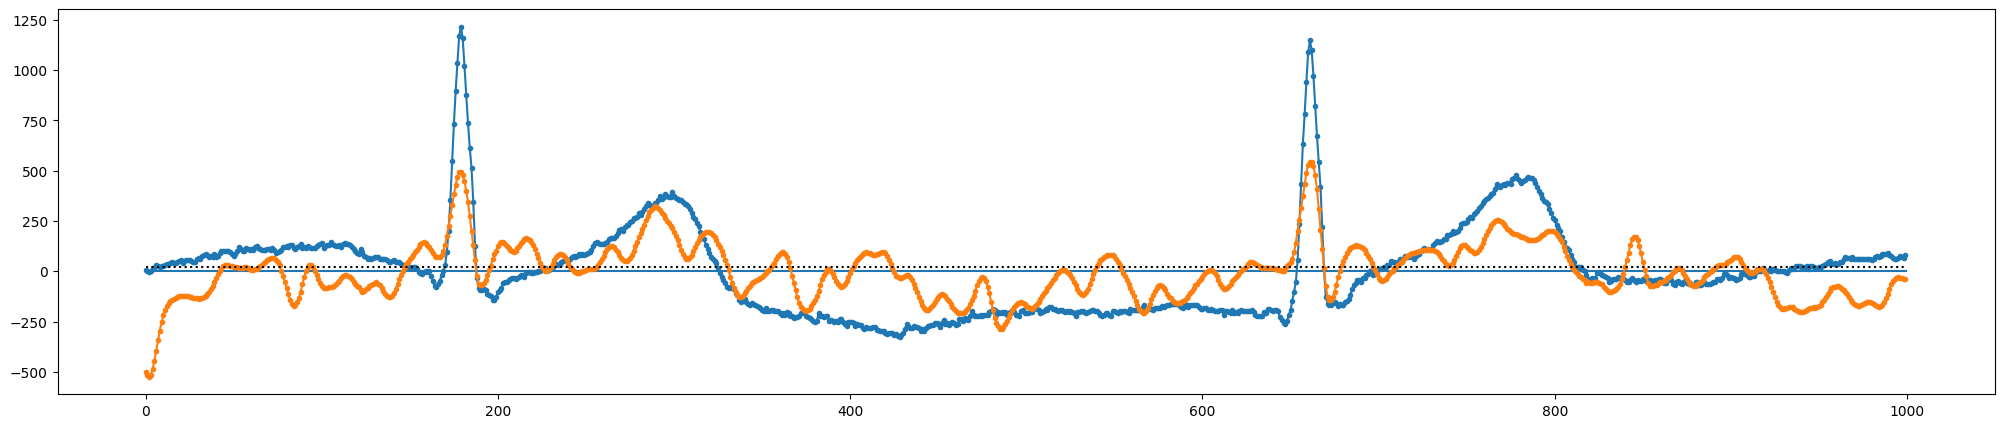

In [10]:
fit_index = int(PERIOD - 0.2 * PERIOD)
for i in range(12):
    plt.figure(figsize=(25, 5))
    plt.hlines(0, 0, fit_index)
    plt.plot(Y[i][:fit_index], '.-')
    plt.plot(rec[i][:fit_index].round(1), '.-')
    plt.hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")

In [11]:
# threshold = 1.25

In [12]:
# difference

In [13]:
# threshold = np.percentile(difference, 97.5)
# threshold

In [14]:
# isolated_peaks = np.where(difference > threshold, Y[:,:fit_index], 0)
# isolated_peaks

In [27]:
def find_consecutive_groups(array):
    groups = []
    current_group = [array[0]]
    for num in array[1:]:
        if num == current_group[-1] + 1:
            current_group.append(num)
        else:
            if len(current_group) > 1:  # We only want to collect groups with more than one consecutive number
                groups.append(current_group)
            current_group = [num]
    if len(current_group) > 1:  # Check the last group in the array
        groups.append(current_group)
    
    return groups

[178 179 180 181 182]
[[178, 179, 180, 181, 182]]
[  1 178 179 660 661]
[[178, 179], [660, 661]]
[180 181 182 183 184]
[[180, 181, 182, 183, 184]]
[178 179 180 660 661]
[[178, 179, 180], [660, 661]]
[179 180 181 182 183]
[[179, 180, 181, 182, 183]]
[182 183 184 656 657]
[[182, 183, 184], [656, 657]]
[186 187 189 190 191]
[[186, 187], [189, 190, 191]]
[185 186 187 188 189]
[[185, 186, 187, 188, 189]]
[  1   2 179 188 189]
[[1, 2], [188, 189]]
[178 179 180 181 661]
[[178, 179, 180, 181]]
[179 180 181 661 662]
[[179, 180, 181], [661, 662]]
[178 179 180 181 661]
[[178, 179, 180, 181]]


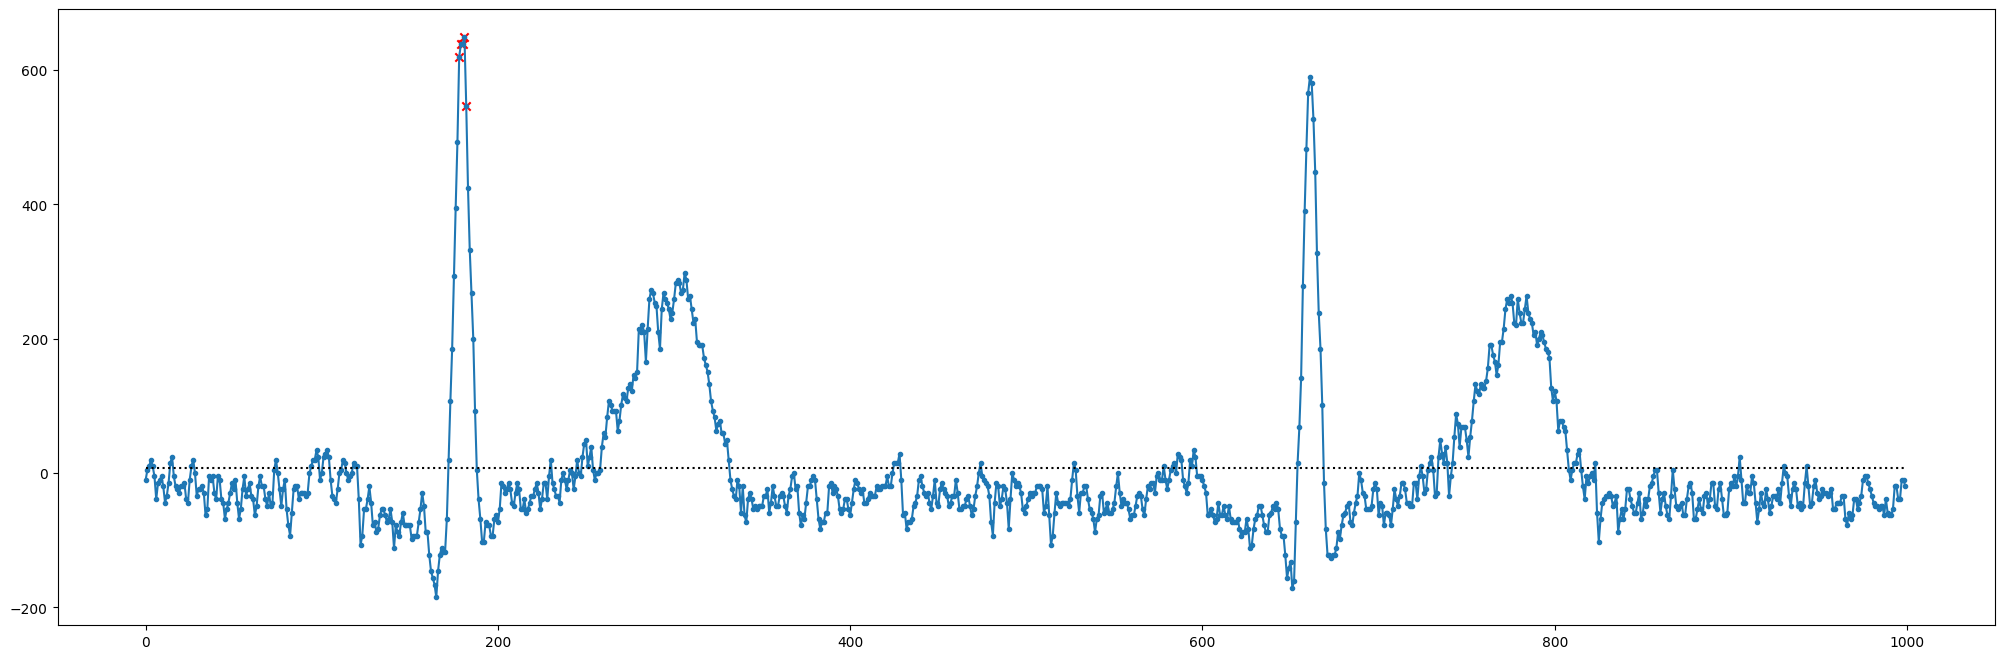

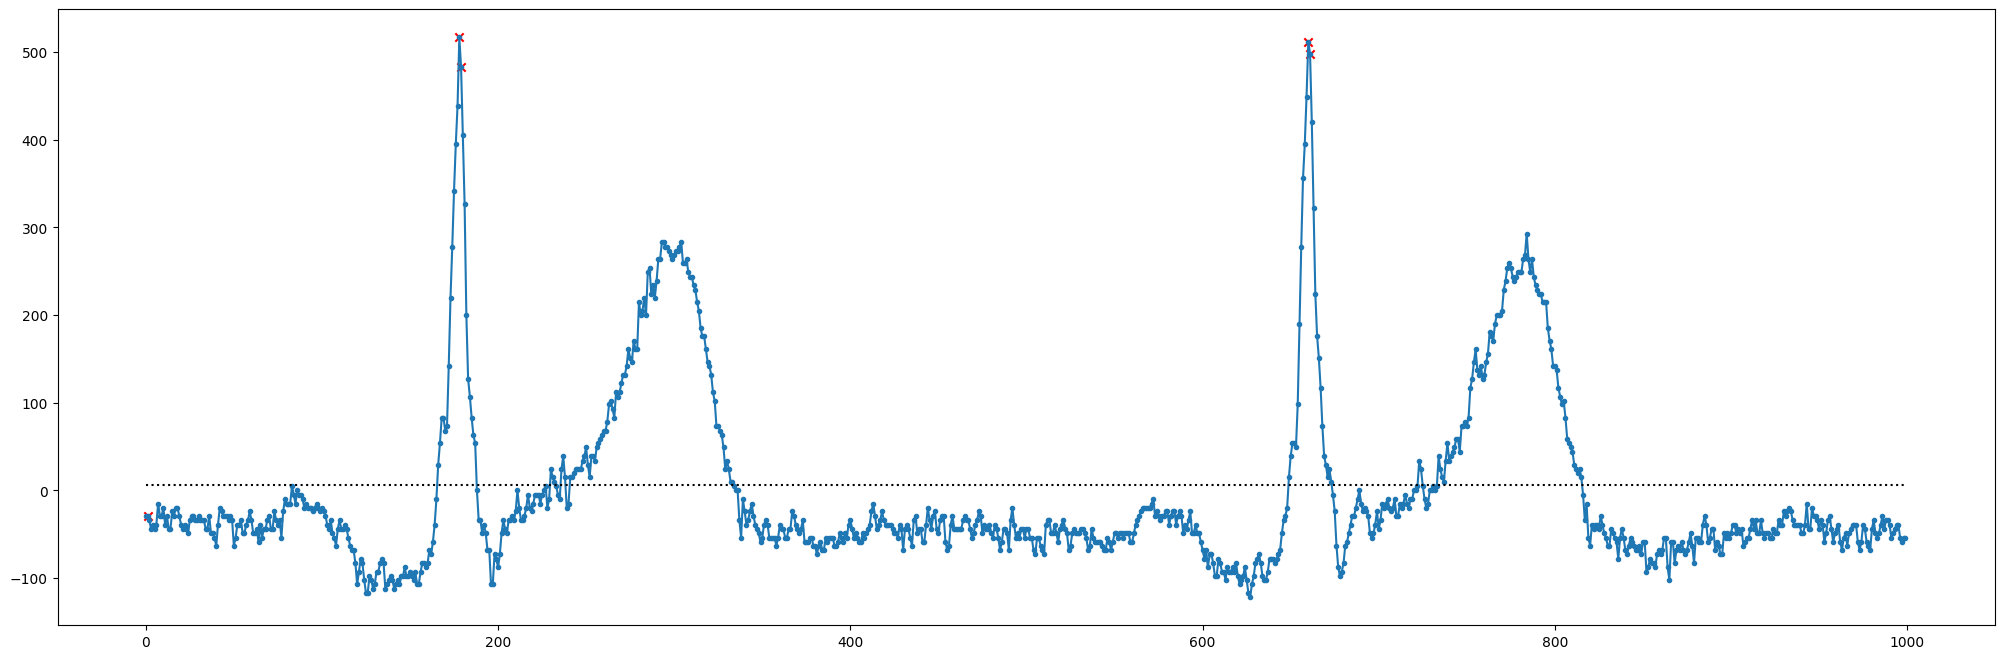

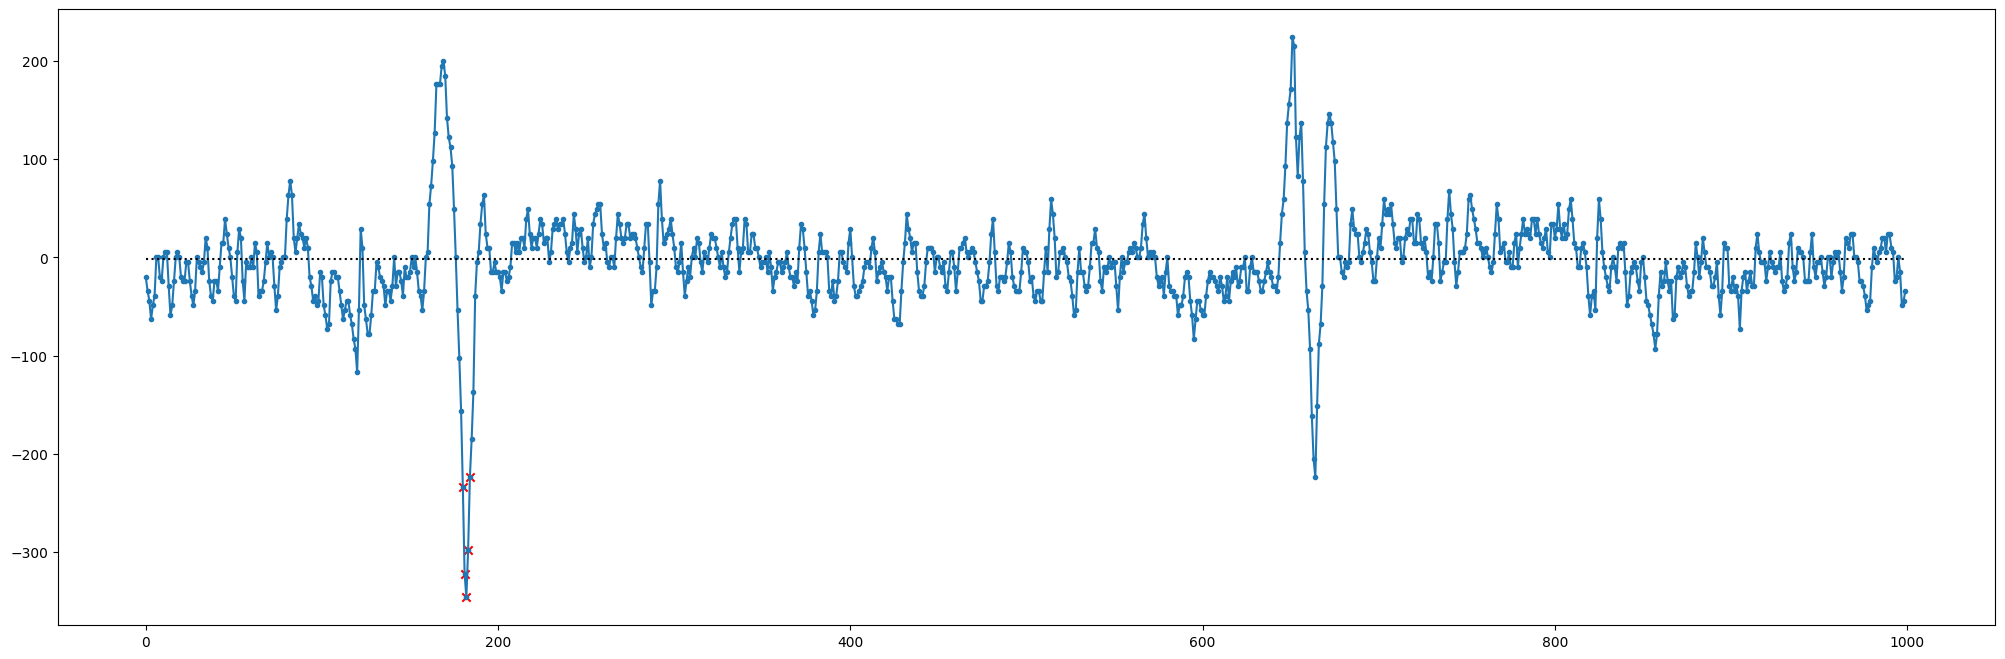

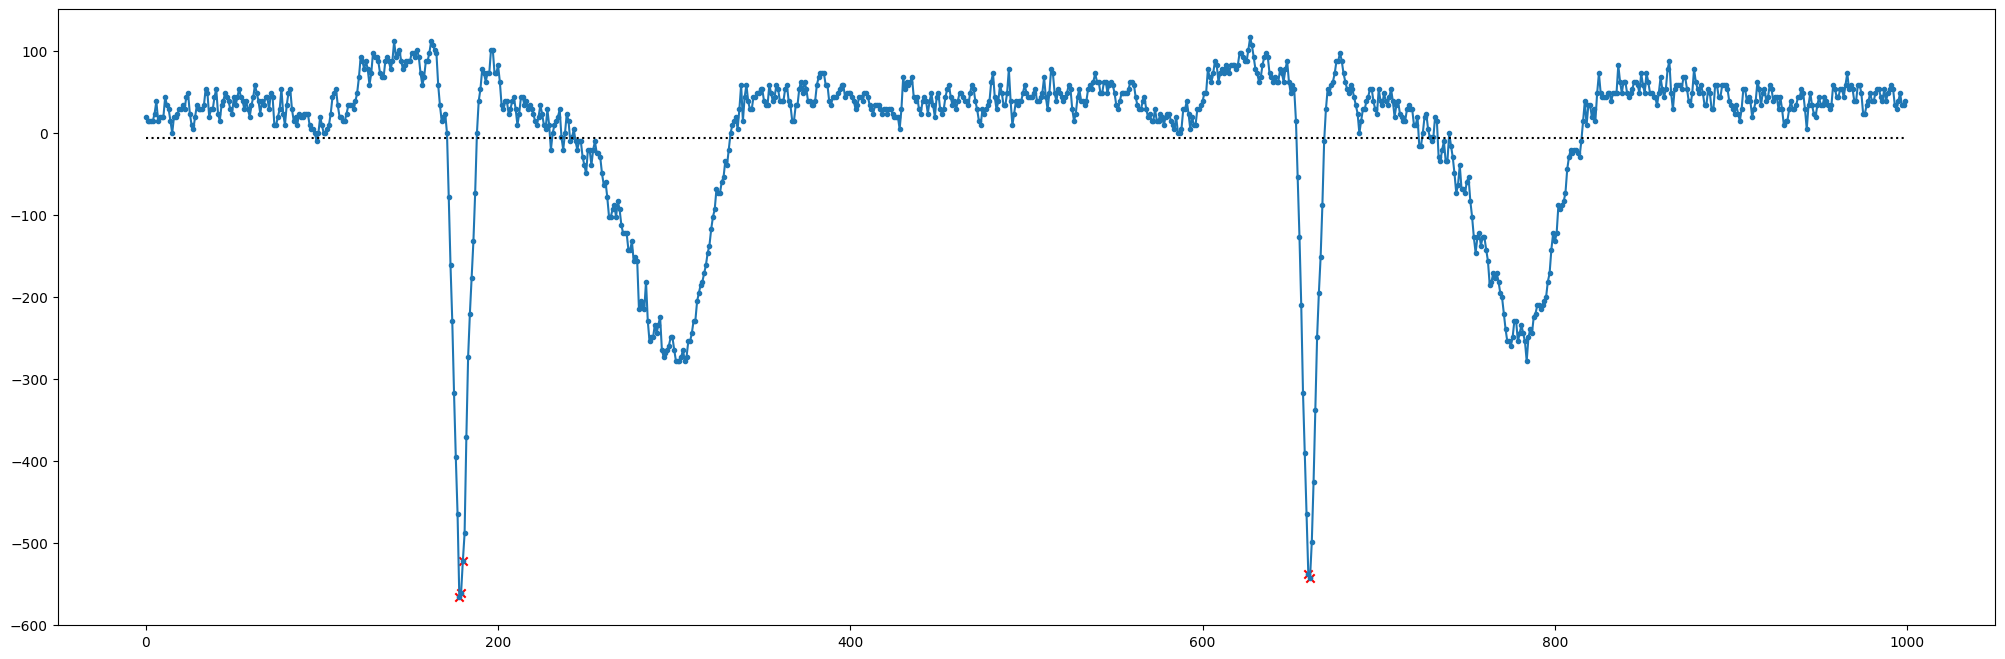

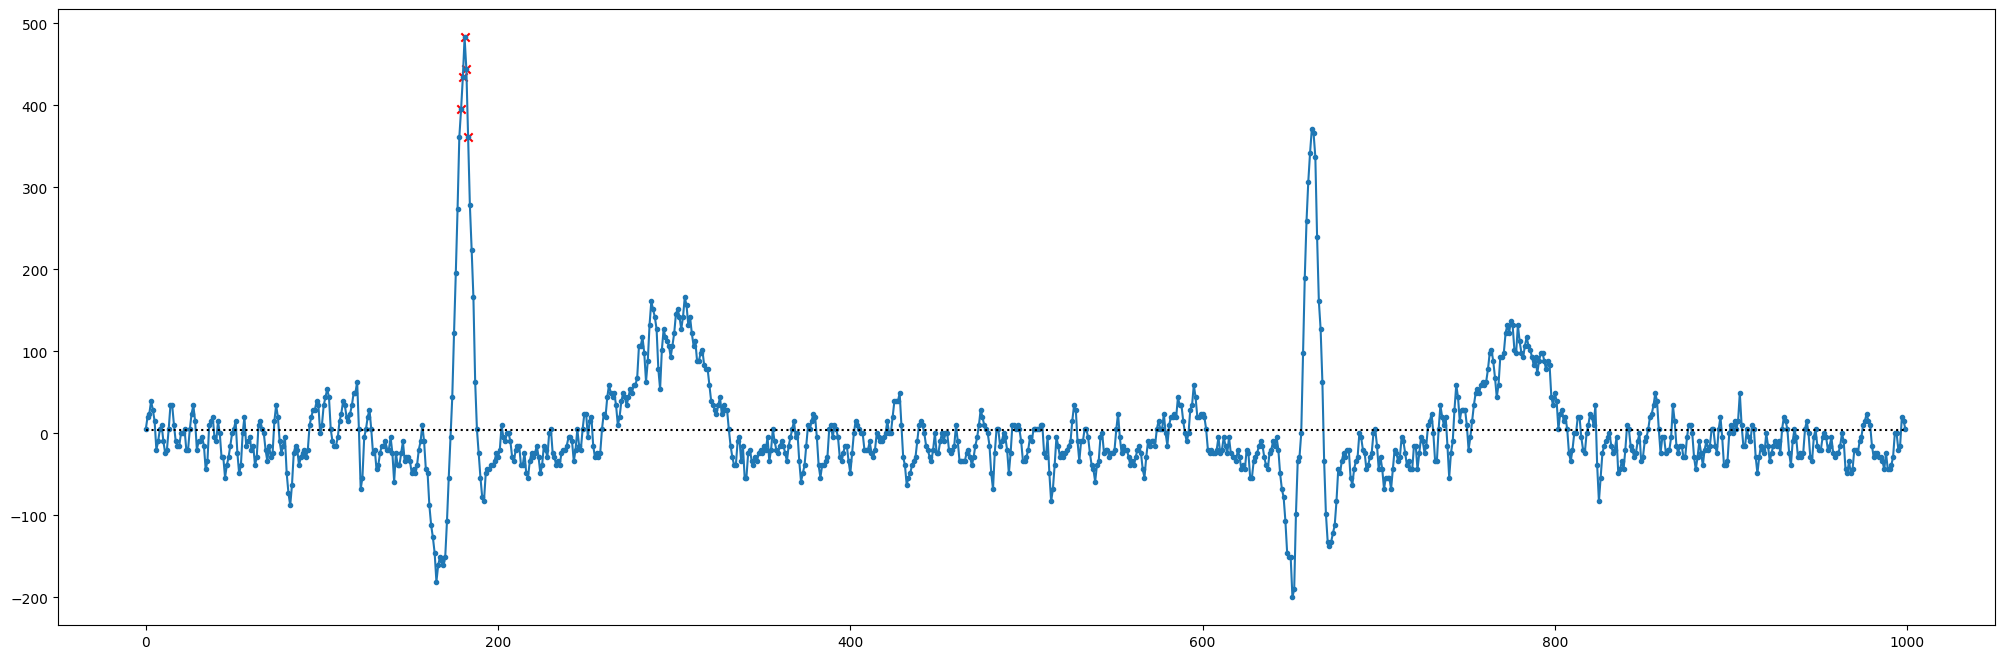

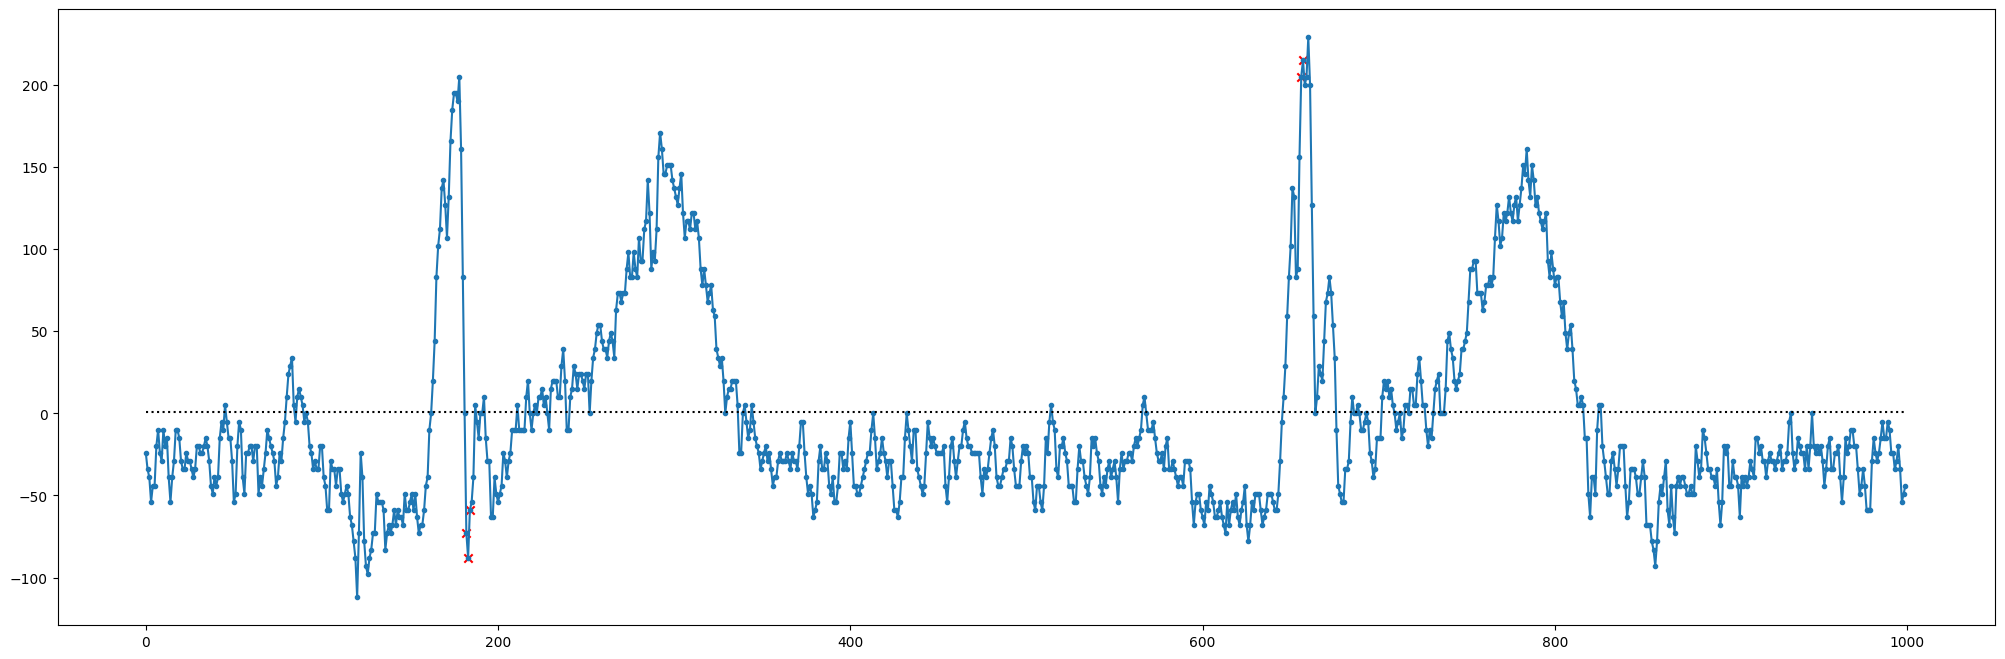

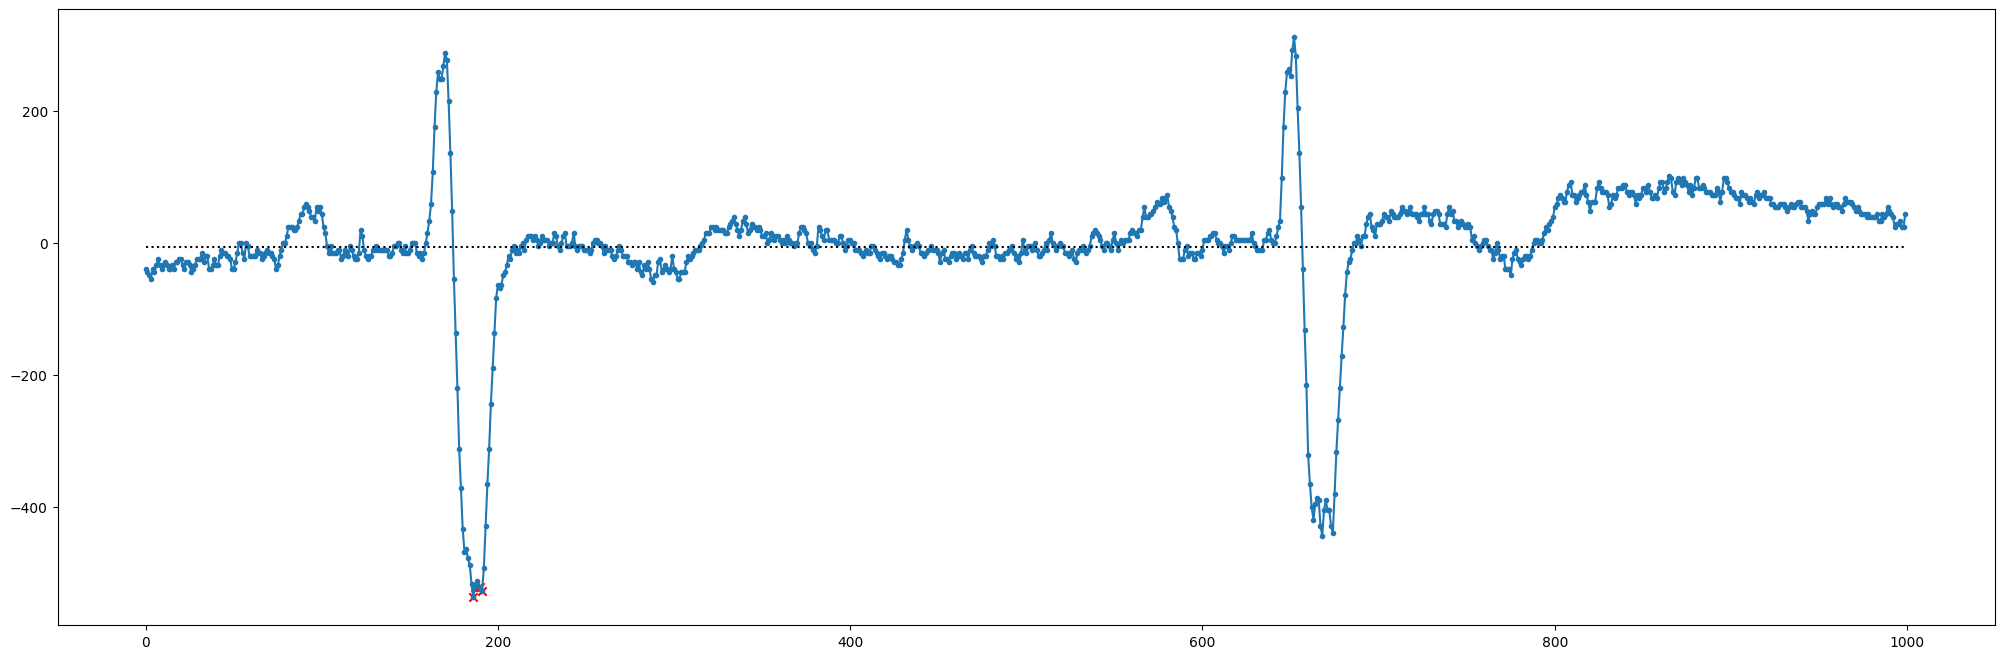

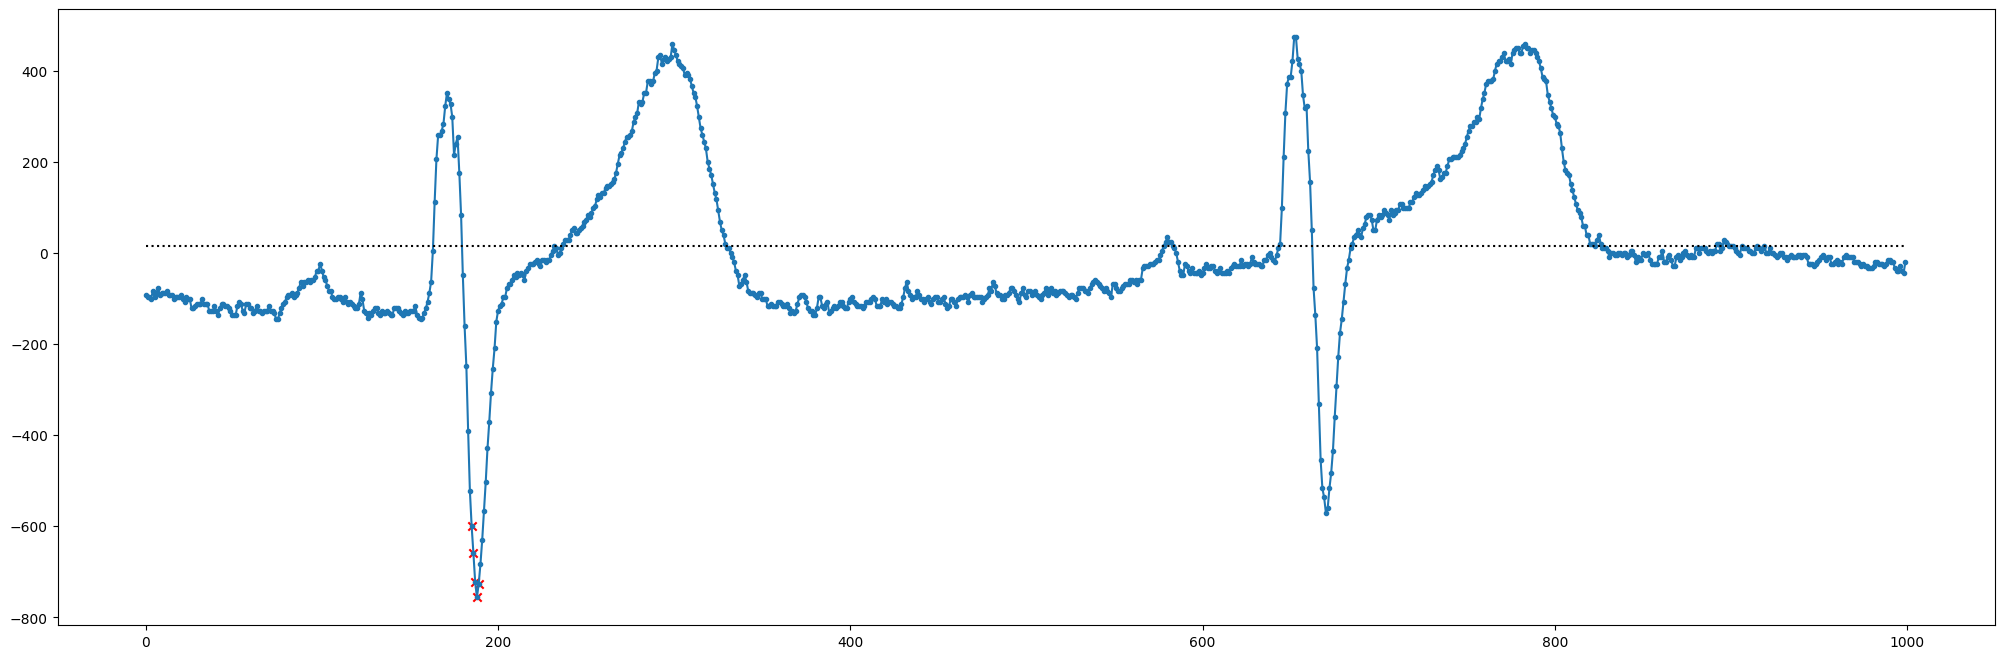

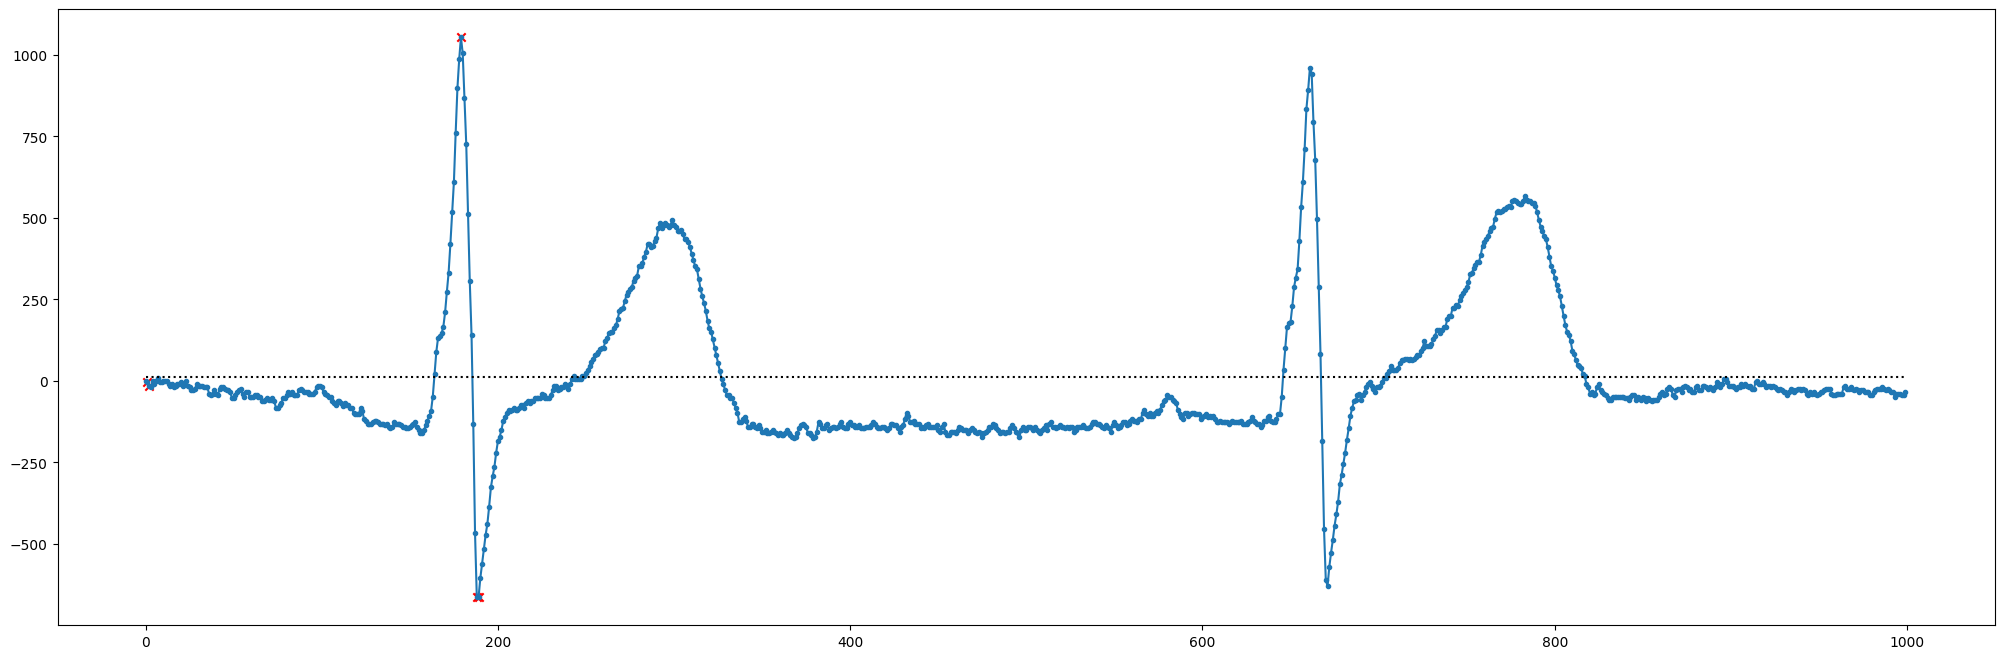

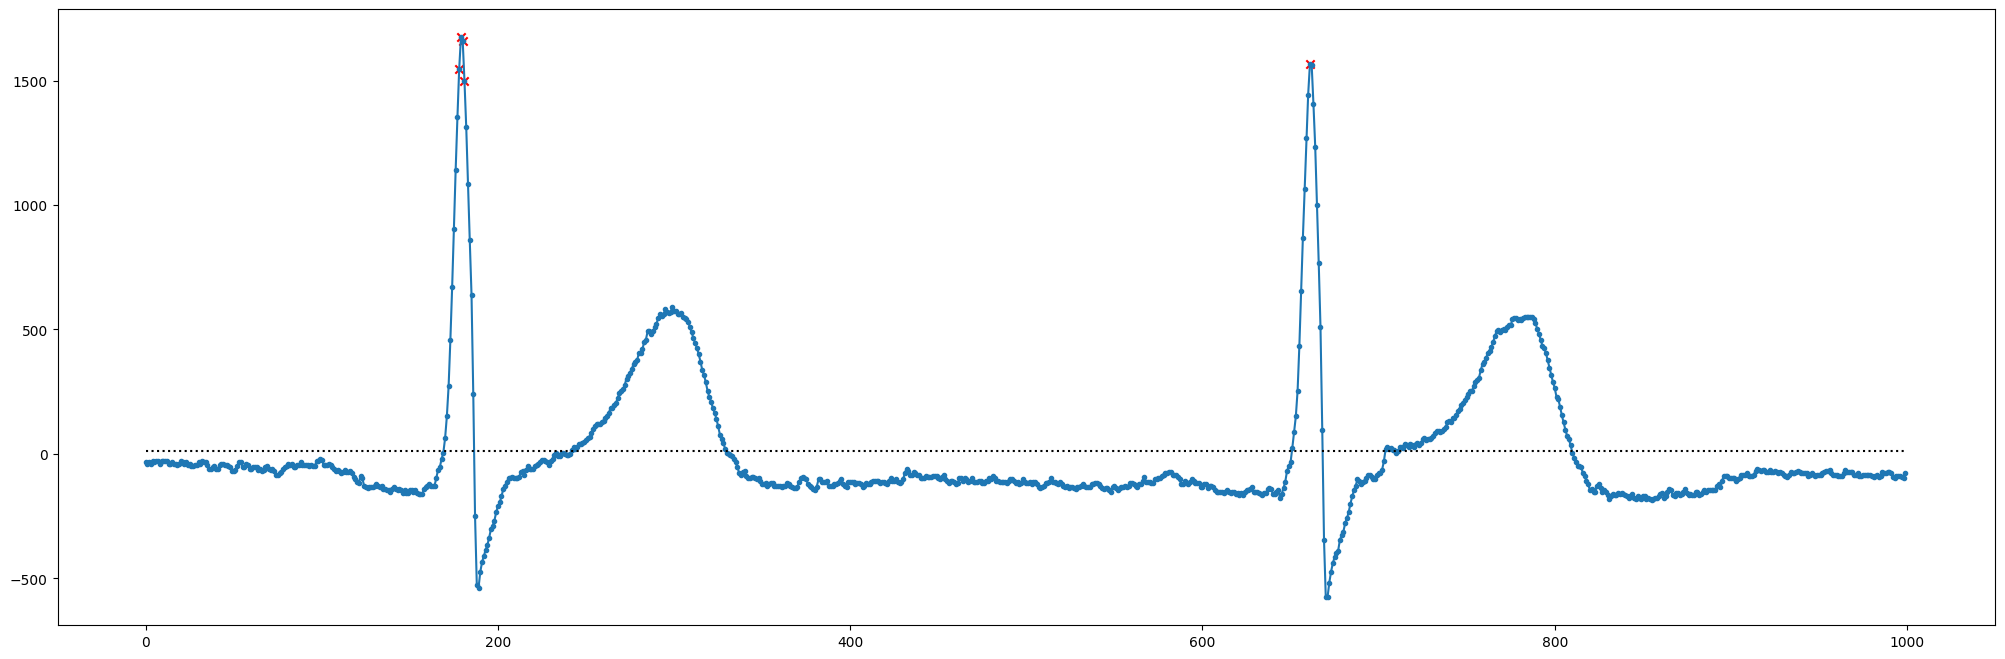

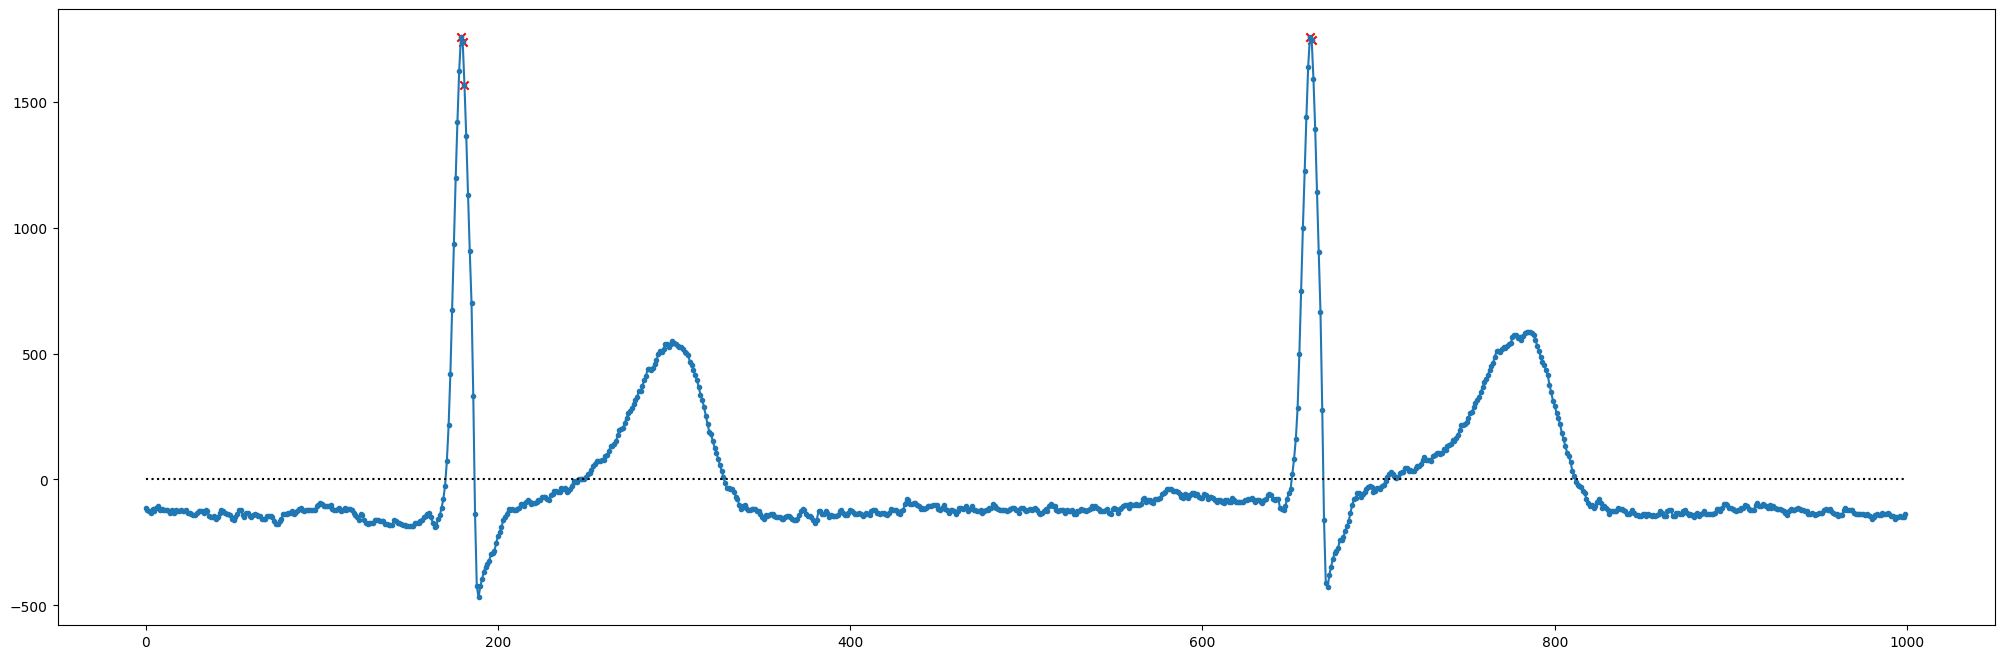

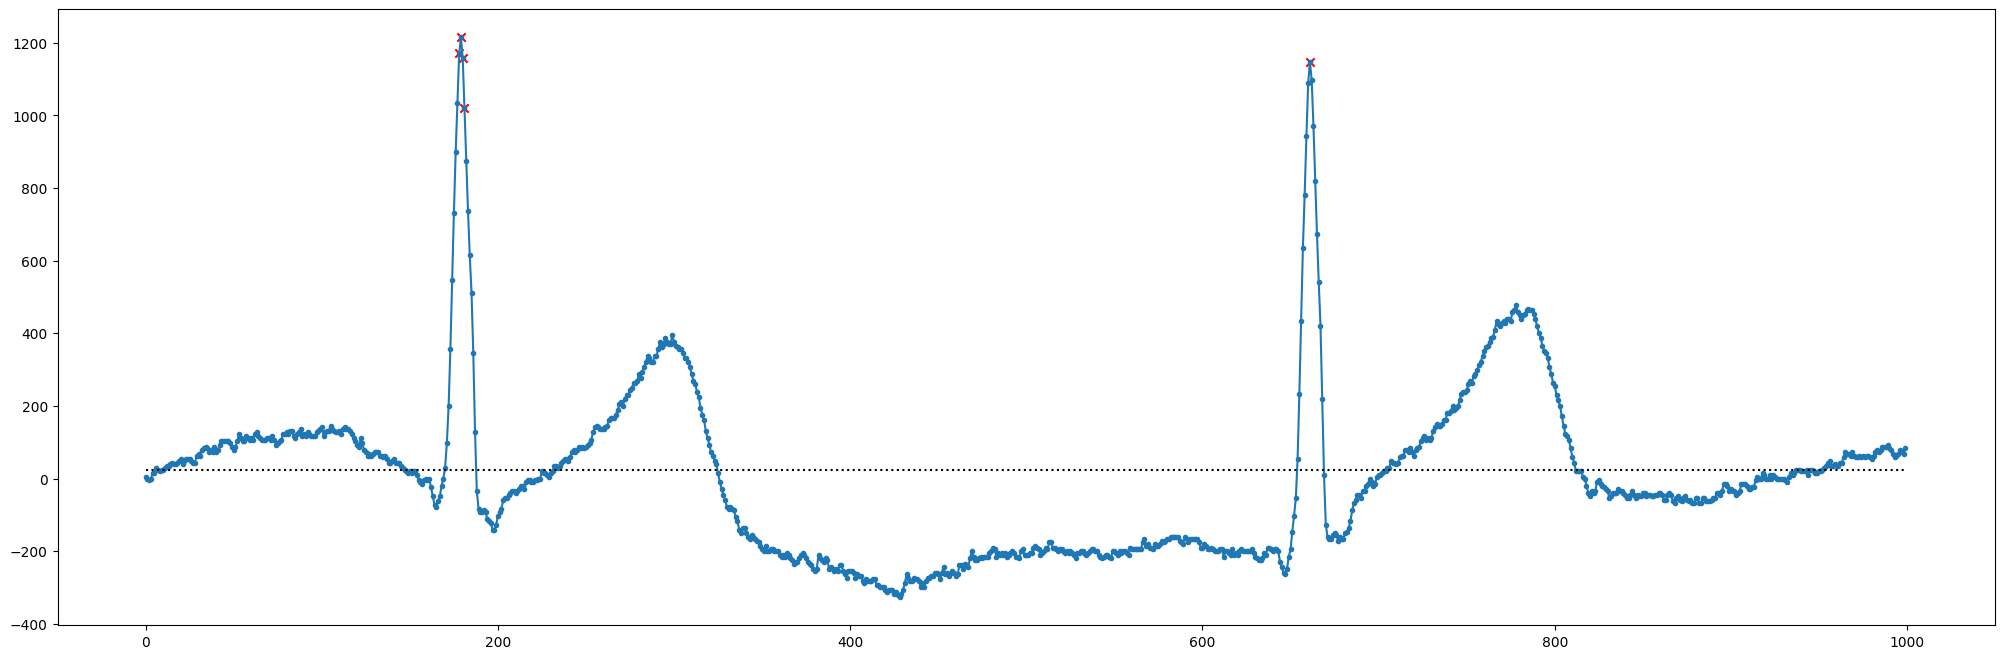

In [40]:
time = np.arange(fit_index)
for i in range(12):    
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    threshold = np.percentile(difference, 99.5)
    
    isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
    non_zero_indices = isolated_peaks != 0
    non_zero_times = time[non_zero_indices]
    non_zero_peaks = isolated_peaks[non_zero_indices]
    
    nzp = np.where(difference > threshold)[0]
    nzp_groups = find_consecutive_groups(nzp)
    print(nzp)
    print(nzp_groups)
    for group in nzp_groups:
        gr_dist = []
        for el in group:
            d_b = np.abs(Y[i][el] - baseline[i])
            d_p = np.abs(Y[i][el] - rec[i][el])
            # if 
        # print(gr_dist.))
    
    plt.figure(figsize=(25, 8))
    plt.plot(time, Y[i][:fit_index], '.-', label='Original Signal')
    # plt.plot(time, rec[i][:fit_index], '.-', label='Modeled Signal')
    plt.scatter(non_zero_times, non_zero_peaks, label='Isolated Peaks', marker='x', c="r")
    # plt.hlines(0, 0, fit_index)
    plt.hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")